In [253]:
#Import Required Libraries 

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import missingno as msno
import zipcodes as zc
import plotly as py
import plotly.graph_objs as go
import math

In [254]:
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [255]:
# Read file and let Python detect the variable types at the cost of memory, rather than guessing the dtypes.
loan=pd.read_csv(r'loan.csv',low_memory=False)

# Data Cleaning 

This section covers the Data Cleaning actions. The following is the high level Data cleaning approach -

* Remove all the columns that have no data.
* Remove all the rows that have no data.
* Remove all the columns that have single unique value.
* Remove all the columns that have NaNs in atleast 1/3rd of the total rows.
* Investigate each column and cleanse the data or delete as appropriate.

In [256]:
# Get some idea on the data size and sample data 
print(loan.shape)
loan.head(2)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [257]:
# Drop columns and Rows that don't have Data or.
loan_data=loan.dropna(axis=1,how='all')
loan_data=loan_data.dropna(axis=0,how='all')

#Drop columns that have same values in complete column
loan_column_nonunique = loan_data.nunique().sort_values()
unique_cols = loan_column_nonunique[loan_column_nonunique==1].index
loan_data.drop(columns=unique_cols,axis=1,inplace=True)

#Ignore columns that have atleast one-third of Nil values, 
#we get 3 columns which are having > 1/3 nill values, we are ignoring and saving in actual dataframe
loan_data = loan_data.loc[:, (loan_data.isnull().sum(axis=0) <= len(loan_data)/3)]

#Now get the final size and remaining columns
print(loan_data.shape)

(39717, 45)


In [258]:

# Check the distribution of NaN across the columns
loan_data[loan_data.columns[loan_data.isnull().any()]].head(2)

,emp_title,emp_length,desc,title,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.70%,Jan-15,May-16,0.00
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.40%,Apr-13,Sep-13,0.00


<AxesSubplot:>

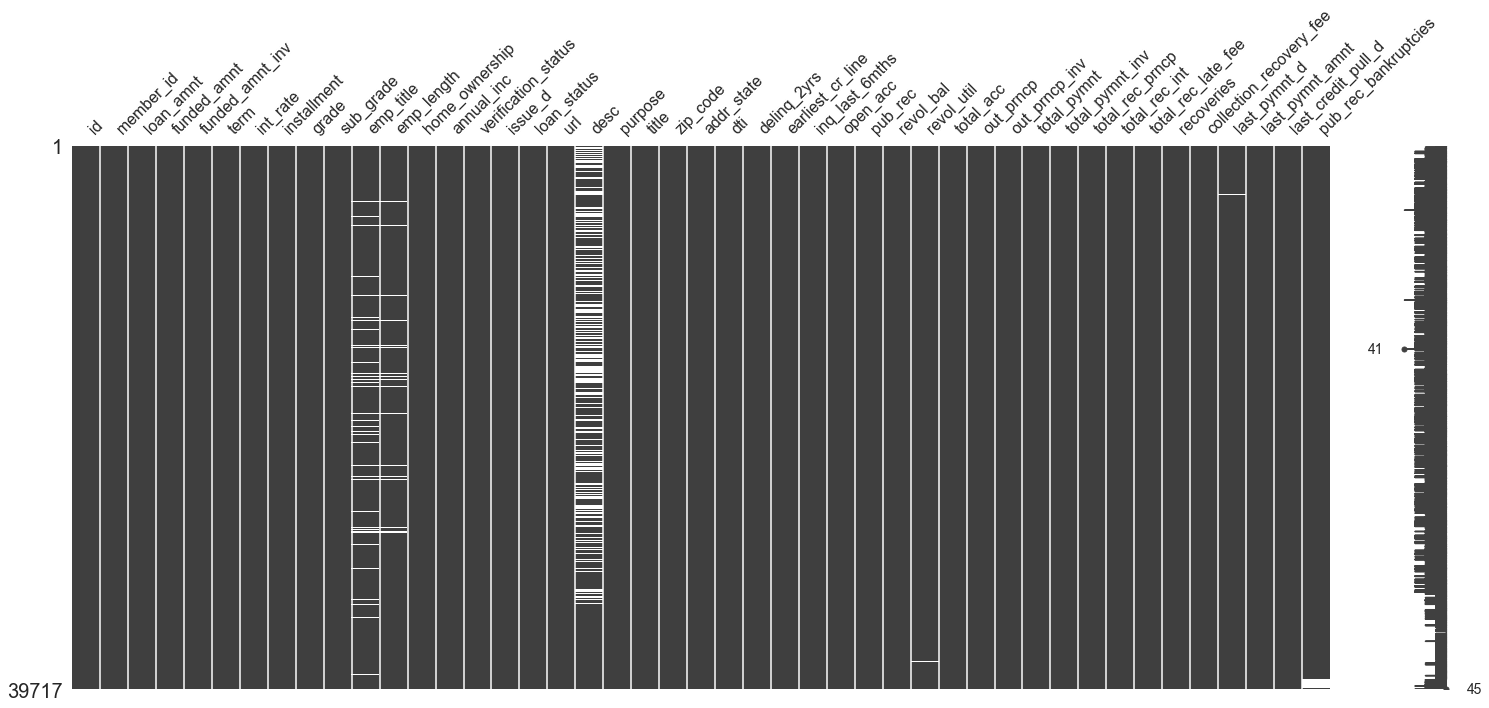

In [259]:
msno.matrix(loan_data)

Now clean and treat each variable in the data set

In [260]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


In [261]:
# To check if disbursed amount is greater then loan amount requested
loan_data[loan_data['funded_amnt'] > loan_data['loan_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [262]:
# Loan Status - Convert loan_status to lower, remove any spaces and find unique values.
print('--- Loan Status ----\n')
loan_data['loan_status']=loan_data['loan_status'].str.strip().str.lower()
print(loan_data.loan_status.nunique())
print(loan_data.loan_status.unique())

# Term - Check 'term' and remove the extra charecters 'Months'. Identify the unique values.
print('--- Term ----\n')
loan_data['term']=loan_data['term'].str.replace(' months','')
print(loan_data['term'].nunique())
print(loan_data['term'].unique())

# To check unique values count in column --> loan_data['loan_status'].value_counts()
group_loan_status = loan_data.groupby(['loan_status'], as_index=False).size().reset_index()
group_loan_status.reset_index(drop=True)
group_loan_status.reset_index()
print(group_loan_status)


# Employement Length - Replace the extraneous charecters in the employee length and impute the NaNs as 'Not Disclosed'
print('--- Employee Length ----\n')
loan_data['emp_length']=loan_data['emp_length'].str.strip().str.replace(' years','').str.replace('+','').str.replace('< 1','0').str.replace(' year','')
loan_data.emp_length.fillna(value='Not Disclosed',inplace=True)
print(loan_data.emp_length.unique())
print(loan_data.emp_length.describe())

# Investigate Annual income
print('--- Annual Income ----\n')
print(loan_data.annual_inc.median())

# Create a new derived column - log to the base 2 for annual income for analysis purpose. Which is the 2 power x
loan_data['annual_inc_log2']=np.log2(loan_data['annual_inc'])
loan_data['annual_inc_log2']

# Issue Date - convert issue date to date time format
print('--- Issue Date ----\n')
loan_data['issue_date_dt']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')
print(loan_data.issue_date_dt.describe())

# Dti - Identify the unique values
print('--- DTI ----\n')
print(loan_data.dti.nunique())


#delinq_2yrs - Number of 30+ months passed after delinquecy incidents in last 2 years.
print('--- delinq_2yrs ----\n')
print(loan_data.delinq_2yrs.nunique())
print(loan_data.delinq_2yrs.unique())
print(loan_data.groupby(by='delinq_2yrs')['id'].count())


#inq_last_6mth - Just check values
print('--- inq_last_6mth ----\n')
print(loan_data.inq_last_6mths.nunique())
print(loan_data.inq_last_6mths.unique())

#int_rate - apply the string cleaning and validate the nunique values
print('--- interest rate ----\n')
loan_data['int_rate_f']=loan_data['int_rate'].str.replace('%','').astype(float)
print(loan_data.int_rate_f.nunique())

#installemnt - Just check 
print('--- installment ----\n')
print(loan_data.installment.nunique())
print(loan_data.installment.describe())
print(loan_data.installment.median())

# pub_rec - Check the values
print('--- pub_rec ----\n')
print(loan_data.pub_rec.nunique())
print(loan_data.pub_rec.unique())


#pub_rec_bankruptcies - Impute 'Not known' for the bankruptcies record where the data is not available. 
print('--- pub_rec_bankruptcies ----\n')
print(loan_data.pub_rec_bankruptcies.unique())
loan_data.pub_rec_bankruptcies.fillna(value='Not Known',inplace=True)
print(loan_data.pub_rec_bankruptcies.unique())


# last_credit_pull_dt - Convert the format and validate the dates.
loan_data['last_credit_pull_dt']=pd.to_datetime(loan_data['last_credit_pull_d'],format='%b-%y')
print(loan_data['last_credit_pull_dt'].min())
print(loan_data['last_credit_pull_dt'].max())

# emp_title - Create a new derived column to categorize if the emp_title is disclosed or not
loan_data.emp_title.describe()
loan_data['emp_title_provided'] = np.where(np.logical_or(loan_data['emp_title'].isnull(), loan_data['emp_title'].str.strip() == ''), False, True)
loan_data['emp_title_provided']=loan_data['emp_title_provided'].apply(lambda x: 'Disclosed' if x is True else 'Not Disclosed')

# title - just check 
loan_data.title.describe()
loan_data.title.head(5)

--- Loan Status ----

3
['fully paid' 'charged off' 'current']
--- Term ----

2
[' 36' ' 60']
   index  loan_status   size
0      0  charged off   5627
1      1      current   1140
2      2   fully paid  32950
--- Employee Length ----

['10' '0' '1' '3' '8' '9' '4' '5' '6' '2' '7' 'Not Disclosed']
count     39717
unique       12
top          10
freq       8879
Name: emp_length, dtype: object
--- Annual Income ----

59000.0
--- Issue Date ----

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_date_dt, dtype: object
--- DTI ----

2868
--- delinq_2yrs ----

11
[ 0  2  3  1  4  6  5  8  7  9 11]
delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: id, dtype: int64
--- inq_last_6mth ----

9
[1 5 2 0 3 4 6 7 8]
--- interest rate ----

371
--- installment -

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

# Observation

* There is high variation of mean and median in annual income. So,clearly there are some outliers

# Home Owner ship


In [263]:
print(loan_data.home_ownership.unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


In [264]:
# As per Data Dictionary, the values for howm ownership should be one of RENT' 'OWN' 'MORTGAGE' 'OTHER'.
# Convert them to lower case, stip out any spaces. 
# Identify how many are outside this designated category.
loan_data['home_ownership']=loan_data['home_ownership'].str.strip().str.lower()

# Values should be one of 'rent' 'own' 'mortgage' 'other' 
loan_data.groupby(by='home_ownership')['loan_amnt'].count()
loan_data[loan_data['home_ownership']=='none']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_log2,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided
39318,231321,214993,10000,10000,"1,228.06",36,7.75%,312.22,A,A3,ups,5,none,"22,200.00",Not Verified,Jan-08,fully paid,https://lendingclub.com/browse/loanDetail.acti...,"I plan to pay off my credit cards, leaving me ...",debt_consolidation,Melinda Holster,233xx,VA,5.24,0,Apr-94,0,9,0,4767,8.70%,22,0.00,0.00,"11,239.62","1,380.00","9,999.99","1,239.63",0.00,0.00,0.00,Feb-11,313.59,Jan-11,Not Known,14.44,2008-01-01,7.75,2011-01-01,Disclosed
39659,121568,121574,4000,4000,"1,925.00",36,9.64%,128.41,B,B4,NaN,0,none,"100,000.00",Not Verified,Aug-07,fully paid,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.00,0,May-99,1,6,0,8155,14.90%,8,0.00,0.00,"4,622.49","2,224.58","4,000.00",622.49,0.00,0.00,0.00,Sep-10,129.76,Aug-07,Not Known,16.61,2007-08-01,9.64,2007-08-01,Not Disclosed
39660,121535,121373,2800,2800,"1,625.00",36,8.70%,88.65,B,B1,NaN,0,none,"120,000.00",Not Verified,Aug-07,fully paid,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.00,0,May-99,1,6,0,8155,14.90%,8,0.00,0.00,"3,191.22","1,852.05","2,800.00",391.22,0.00,0.00,0.00,Sep-10,89.80,Aug-07,Not Known,16.87,2007-08-01,8.70,2007-08-01,Not Disclosed


In [265]:
# There are only 3 such observatiions. These observations doesn't cause any issue to the charged off loan univariate analysis.
# When we drop them from 'Fully paid' data, it is only a small percentage.

loan_data.drop(loan_data[loan_data.home_ownership == 'none'].index, inplace=True)
print(loan_data.home_ownership.unique())

['rent' 'own' 'mortgage' 'other']


In [266]:
loan_data.groupby(by='home_ownership')['loan_amnt'].count()

home_ownership
mortgage    17659
other          98
own          3058
rent        18899
Name: loan_amnt, dtype: int64

# Verification status

In [267]:
print(loan_data.verification_status.nunique())
print(loan_data.verification_status.unique())

3
['Verified' 'Source Verified' 'Not Verified']


In [268]:
# There are two categories here. Income verified or not. Source of income(employability) is verified or not. 
# We can derive new boolean column from income and source verification.

loan_data['source_verification'] = np.where(loan_data['verification_status'].str.strip() == 'Source Verified', True, False)
loan_data['income_verification'] = np.where(np.logical_or(loan_data['verification_status'].str.strip() == 'Verified', 
                                                    loan_data['verification_status'].str.strip() == 'Source Verified'), True, False)

print(loan_data.income_verification.nunique())
print(loan_data.income_verification.unique())
print(loan_data.source_verification.nunique())
print(loan_data.source_verification.unique())

2
[ True False]
2
[False  True]


# Purpose and Desc

In [269]:
loan_data['purpose']=loan_data['purpose'].str.strip().str.lower()
print(loan_data.purpose.describe())
print(loan_data.purpose.unique())
loan_data.grade.unique()

count                  39714
unique                    14
top       debt_consolidation
freq                   18640
Name: purpose, dtype: object
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [270]:
# Genralise/Narrow down the loan purpose. For example, credit_card balance clearence is same as debit consolidation. 

purpose_maping={'credit_card':'debt_consolidation',
            'car':'Auto',
             'small_business':'small_business',
             'other':'other',
             'wedding':'wedding',
             'debt_consolidation': 'debt_consolidation',
             'home_improvement':'home_improvement',
             'major_purchase':'major_purchase',
             'medical':'medical',
             'moving':'home_improvement',
             'vacation':'vacation',
             'house':'home_improvement',
             'renewable_energy':'home_improvement',
             'educational':'educational'
            }
loan_data['purpose_mapped']=loan_data['purpose'].map(purpose_maping)
loan_data.groupby(by=['purpose_mapped'])['id'].count()

purpose_mapped
Auto                   1549
debt_consolidation    23770
educational             325
home_improvement       4043
major_purchase         2187
medical                 693
other                  3991
small_business         1828
vacation                381
wedding                 947
Name: id, dtype: int64

In [271]:
# Impute 'Not Disclosed' in the 'Desc' column for NaNs
loan_data.desc.fillna(value='Not Disclosed',inplace=True)
print(loan_data.desc.describe())

count             39714
unique            26525
top       Not Disclosed
freq              12940
Name: desc, dtype: object


# Observation

* From eye ball checks, it is evident that some of the loans are availed for debt consolidation.
* For example, with reason of wedding, loan was availed to clear off credit card balance. So process mapping will need to be done. Do a generic search for the work 'consolidate' and categorise the 'purpose'.
* We can only use the work 'pay off', but that will map some genuine observations. For this exercise we considered only 'consolidate'

In [272]:
# Apply the changes on 'purpose_mapped' as mentioned above.

a='consolidate'
temp_frame_non_dbtc=loan_data[loan_data['purpose_mapped']!='debt_consolidation']
temp_frame_dbtc=loan_data[loan_data['purpose_mapped']=='debt_consolidation']
bool_frame=temp_frame_non_dbtc['desc'].apply(lambda x:True if a in x else False)
temp_frame_non_dbtc_hits=temp_frame_non_dbtc[bool_frame]
temp_frame_non_dbtc_nohits=temp_frame_non_dbtc[~bool_frame]
temp_frame_non_dbtc_hits['purpose_mapped']='debt_consolidation'

loan_data = pd.concat([temp_frame_non_dbtc_hits,temp_frame_non_dbtc_nohits,temp_frame_dbtc],axis=0)

print(loan_data.groupby(by=['purpose_mapped'])['id'].count())

purpose_mapped
Auto                   1538
debt_consolidation    24124
educational             314
home_improvement       3995
major_purchase         2145
medical                 673
other                  3804
small_business         1819
vacation                376
wedding                 926
Name: id, dtype: int64


# Zip Code and Address State Cleaning

In [273]:
# Eye ball Check zip_code and address.
loan_data.groupby(by=['addr_state','zip_code'])['id'].count().reset_index()

,addr_state,zip_code,id
0,AK,352xx,1
1,AK,363xx,1
2,AK,995xx,33
3,AK,996xx,13
4,AK,997xx,21
...,...,...,...
892,WY,827xx,5
893,WY,828xx,7
894,WY,829xx,19
895,WY,830xx,7


# Assumption

* We are assuming that the zip codes on the application are correct.
* State codes will be derived from python standard package using the zip codes.

In [274]:
# Clearly there is an issue. zip code of 352 and 363 belong to Alabama(AL) and not AK. 
# Set up code to extract correct state using zip-code.
loan_data['zip_code_str']=loan_data['zip_code'].str.replace('xx','')
a=loan_data['zip_code_str'].unique()
b=[]
c=[]
for i in a:  
    j=zc.similar_to(i)
    if len(j)==0:
        b.append('NIU')
        c.append('NOP')
    else:   
        b.append(j[0].get('state'))
        c.append(j[0].get('city'))
        
d={'zip_code_str':a,'state_code':b,'city_code':c}
temp_zip_code_city_frame=pd.DataFrame(data=d)
loan_data= loan_data.merge(temp_zip_code_city_frame, how = 'inner', on = ['zip_code_str'])


In [275]:
# Check zip_code and address.
print(loan_data.groupby(by=['state_code','zip_code_str'])['id'].count().reset_index())


    state_code zip_code_str  id
0           AE          090   1
1           AE          093   1
2           AE          094   2
3           AE          096   1
4           AK          995  33
..         ...          ...  ..
818         WY          827   6
819         WY          828   7
820         WY          829  19
821         WY          830   7
822         WY          831   1

[823 rows x 3 columns]


* The zip codes and the state codes now appear correct

# Earliest_cr_line ( Date when the first credit was applied)

We can clean this column and calculate the Credit Age of the applicant. The credit Age will be the difference in the issue date
and date when the applicat first applied for the loan. Generally, the normal credit Age of the applicant is a good propect.
Too high credit age implies, the age of applicant is too high and so risky.
Too low credit age implies, there is uncertainity on the credit profile of the customer.

In [276]:
loan_data['earliest_cr_line_dt']=pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')
print(loan_data['earliest_cr_line_dt'].min())
print(loan_data['earliest_cr_line_dt'].max())

1969-02-01 00:00:00
2068-12-01 00:00:00


In [277]:
# Earliest credit line of 2068 doesn't make sense. This appears to be due to limitation in python. 
# Python datetime library can only read dates until 1968. 

loan_data['earliest_cr_line_dt_fine']=loan_data['earliest_cr_line_dt'].apply(lambda x :x.replace(year=x.year-100) if x.year > 2018 else x)
print(loan_data['earliest_cr_line_dt_fine'].min())
print(loan_data['earliest_cr_line_dt_fine'].max())

1946-01-01 00:00:00
2008-11-01 00:00:00


In [278]:
# Take timedelta of issue_date_dt and earliest_cr_line_dt_fine to determin the 'credit Age/History of applicant'. 
# Calculate the credit History in terms of years

loan_data['time_delta']=loan_data['issue_date_dt']-loan_data['earliest_cr_line_dt_fine']
loan_data['time_delta_int']=loan_data['time_delta']/np.timedelta64(1, 'Y')
print(loan_data['time_delta_int'].min())
print(loan_data['time_delta_int'].max())


2.998008172652416
65.41407421096942


# Open_acc and total_acc

In [279]:
print(loan_data.open_acc.nunique())
print(loan_data.open_acc.unique())

40
[ 9  8 14 10  5 15  4  6  7 18 17 19 13 12 22 11  2 16 30 23  3 20 24 21
 26 25 35 28 29 31 34 27 32 33 44 38 36 41 42 39]


In [280]:
print(loan_data.total_acc.nunique())
print(loan_data.total_acc.unique())

82
[21 16  9 39 24 26 35 15 36 12  8 17 29 37 45 23 27 19 40 14 20 42 10 13
 54 38 18 25 22 31 33  7 28 49 30  3 34 56  6 50  4 77 53 41 11  5 59 32
 52 46 47 48 44 60 51 43 79 62 63 57 61 67 90 58 55 70 65 71 78  2 64 76
 81 68 69 87 75 66 73 72 74 80]


In [281]:
# Calculate the open account ratio
loan_data['open_acct_ratio']=loan_data['open_acc']/loan_data['total_acc']

In [282]:
# Do a sanity check on the ratio. It should be between 0 and 1.
loan_data[np.where(loan_data['open_acct_ratio'] > 1, True, False)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_log2,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped,zip_code_str,state_code,city_code,earliest_cr_line_dt,earliest_cr_line_dt_fine,time_delta,time_delta_int,open_acct_ratio
35158,127213,85483,2000,2000,"1,575.00",36,7.12%,61.87,A,A1,U.S. Government,10,mortgage,"118,000.00",Not Verified,Sep-07,fully paid,https://lendingclub.com/browse/loanDetail.acti...,consolidate debt,debt_consolidation,consolidate debt,020xx,MA,0.43,0,Jun-91,0,14,0,4709,18.50%,8,0.00,0.00,"2,219.43","1,747.80","2,000.00",219.43,0.00,0.00,0.00,Apr-10,3.06,Apr-10,Not Known,16.85,2007-09-01,7.12,2010-04-01,Disclosed,False,False,debt_consolidation,020,MA,Accord,1991-06-01,1991-06-01,5936 days,16.25,1.75


In [283]:
loan_data[loan_data['open_acct_ratio']<0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_log2,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped,zip_code_str,state_code,city_code,earliest_cr_line_dt,earliest_cr_line_dt_fine,time_delta,time_delta_int,open_acct_ratio


# Observation:

* Looking at this observation, it appears that either total account or open account value was incorrectly keyed in.
There are two options
    * to update the total_acc to '14' or
    * to delete the observation. (We can't give arbitrary open account) Dropping the observation makes sense as this is just 1 observation - a very small percentage of 'fully paid loans'.

In [284]:
loan_data.drop(loan_data[loan_data.id == 127213].index, inplace=True)

# Revol_bal (Revolving Balance) and Revol_util (Revolving balance utilisation rate)

In [285]:
print(loan_data.revol_bal.nunique())
print(loan_data.revol_util.nunique())

21711
1089


In [286]:
loan_data.revol_util=loan_data.revol_util.str.replace('%','').astype(float)

Note:

There are some NaNs in the revolving utilization. See the percentage of the NaN values to the complete observations and
conclude if the observations with NaNs can be dropped.

In [287]:
print(loan_data[loan_data.revol_util.isna()].groupby(by='loan_status')['id'].count())
print('--------------')
print(loan_data[~loan_data.revol_util.isna()].groupby(by='loan_status')['id'].count())

loan_status
charged off    16
fully paid     34
Name: id, dtype: int64
--------------
loan_status
charged off     5611
current         1140
fully paid     32912
Name: id, dtype: int64


In [288]:
## Drop these records, as the percentage is really small in each segment.
loan_data.dropna(subset=['revol_util'],inplace=True)

* Analyse the values of each of the amount based columns.
* These columns in general are the result of the loan status rather than the cause of the loan status
* These columsn can be eventually dropped.

In [289]:
loan_data[loan_data['loan_status'] != 'current'][['out_prncp',
'out_prncp_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'total_pymnt',
'total_pymnt_inv',
'last_pymnt_d',
'last_pymnt_amnt']].describe()

,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_pymnt_amnt
count,"38,523.00","38,523.00","38,523.00","38,523.00","38,523.00","38,523.00","38,523.00","38,523.00","38,523.00","38,523.00"
mean,0.00,0.00,"9,656.92","2,120.98",1.37,98.02,12.75,"11,877.29","11,282.00","2,749.47"
std,0.00,0.00,"7,009.52","2,390.52",7.32,699.03,150.89,"8,810.57","8,701.26","4,496.89"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,"4,500.00",644.86,0.00,0.00,0.00,"5,519.67","5,031.53",217.78
50%,0.00,0.00,"8,000.00","1,301.47",0.00,0.00,0.00,"9,686.87","9,076.98",569.18
75%,0.00,0.00,"13,200.00","2,673.27",0.00,0.00,0.00,"16,147.45","15,341.95","3,451.66"
max,0.00,0.00,"35,000.02","23,563.68",180.20,"29,623.35","7,002.19","58,563.68","58,563.68","36,115.20"


In [290]:
loan_data[loan_data['loan_status'] != 'current'][['out_prncp',
'out_prncp_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'total_pymnt',
'total_pymnt_inv',
'last_pymnt_d',
'last_pymnt_amnt']].nunique()

out_prncp                      1
out_prncp_inv                  1
total_rec_prncp             6828
total_rec_int              33978
total_rec_late_fee          1317
recoveries                  4026
collection_recovery_fee     2610
total_pymnt                36660
total_pymnt_inv            36335
last_pymnt_d                 101
last_pymnt_amnt            34386
dtype: int64

# Grade and Subgrade - Category of the loan assigned by Lending Club

* There is no information on what basis the 'Grade' and 'Subgrade' are allocated to the observations.
Analysis will be done to understand if there are any correlated variables.

In [291]:
print(loan_data.grade.describe())
print(loan_data.sub_grade.describe())

count     39663
unique        7
top           B
freq      12017
Name: grade, dtype: object
count     39663
unique       35
top          B3
freq       2917
Name: sub_grade, dtype: object


In [292]:
# Look at 'grade' and see how LC has assigned this value.
loan_data.grade.astype(str)
loan_data.sub_grade.astype(str)
loan_data.sort_values(by=['grade'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_log2,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped,zip_code_str,state_code,city_code,earliest_cr_line_dt,earliest_cr_line_dt_fine,time_delta,time_delta_int,open_acct_ratio
0,1063270,1295780,10625,10625,"10,625.00",36,7.51%,330.56,A,A3,Dennis Alleman DMD,5,mortgage,"23,000.00",Not Verified,Dec-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/13/11 > I plan to conso...,medical,Bills,970xx,OR,18.89,0,Feb-05,1,9,0,7114,43.40,21,0.00,0.00,"11,843.01","11,843.01","10,625.00","1,218.01",0.00,0.00,0.00,Jun-14,"2,594.01",Oct-15,0.00,14.49,2011-12-01,7.51,2015-10-01,Disclosed,False,False,debt_consolidation,970,OR,Antelope,2005-02-01,2005-02-01,2494 days,6.83,0.43
13085,611832,784556,12000,7525,"7,525.00",36,5.79%,228.21,A,A2,Mountain View School District,10,mortgage,"70,000.00",Source Verified,Nov-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/08/10 > We are using th...,home_improvement,Reroof,917xx,CA,8.55,0,Mar-81,0,7,0,15102,33.00,32,0.00,0.00,"8,215.62","8,215.62","7,525.00",690.62,0.00,0.00,0.00,Dec-13,248.37,Nov-13,0.00,16.10,2010-11-01,5.79,2013-11-01,Disclosed,True,True,home_improvement,917,CA,Rancho Cucamonga,1981-03-01,1981-03-01,10837 days,29.67,0.22
13087,606137,777558,12800,8575,"8,575.00",36,5.79%,260.06,A,A2,Futuro Infantil Hispano,0,rent,"38,000.00",Verified,Nov-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/28/10 > This loan will ...,wedding,Loan to help start our future together..,917xx,CA,24.88,0,Dec-87,1,13,0,7448,26.60,23,0.00,0.00,"9,361.16","9,361.16","8,575.00",786.16,0.00,0.00,0.00,Oct-13,545.81,Oct-13,0.00,15.21,2010-11-01,5.79,2013-10-01,Disclosed,False,True,wedding,917,CA,Rancho Cucamonga,1987-12-01,1987-12-01,8371 days,22.92,0.57
13088,598187,767768,12000,12000,"11,836.15",36,7.51%,373.33,A,A4,Glendora Digestive Disease Institute,2,mortgage,"36,000.00",Not Verified,Oct-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Not Disclosed,other,Pay off credit cards,917xx,CA,4.07,0,Apr-93,0,8,0,6110,17.60,21,0.00,0.00,"12,775.41","12,591.25","12,000.00",775.41,0.00,0.00,0.00,Nov-11,"8,684.18",Jul-13,0.00,15.14,2010-10-01,7.51,2013-07-01,Disclosed,False,False,other,917,CA,Rancho Cucamonga,1993-04-01,1993-04-01,6392 days,17.50,0.38
13090,585801,752621,4000,4000,"4,000.00",36,7.51%,124.45,A,A4,Round Table Pizza,5,mortgage,"19,200.00",Source Verified,Sep-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 09/23/10 > My job is very ...,major_purchase,MOTORCYCLE LOAN,917xx,CA,1.63,0,Mar-04,0,4,0,465,9.70,4,0.00,0.00,"4,302.41","4,302.41","4,000.00",302.41,0.00,0.00,0.00,Jun-12,443.61,Jul-15,0.00,14.23,2010-09-01,7.51,2015-07-01,Disclosed,True,True,major_purchase,917,CA,Rancho Cucamonga,2004-03-01,2004-03-01,2375 days,6.50,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,747449,946378,16000,16000,"16,000.00",60,23.59%,456.49,G,G5,Lewis and Lewis Inc.,5,own,"35,088.00",Source Verified,May-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/06/11 > I am planning o...,major_purchase,Consolidate,829xx,WY,18.33,0,Dec-00,1,2,0,3900,97.50,15

In [293]:
# From the above, looks like, there is some relation between 'grade and 'sub-grade'. Sort both of them.
loan_data.sort_values(by=['grade','sub_grade'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_inc_log2,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped,zip_code_str,state_code,city_code,earliest_cr_line_dt,earliest_cr_line_dt_fine,time_delta,time_delta_int,open_acct_ratio
53,606714,778331,10000,10000,"10,000.00",36,5.42%,301.60,A,A1,NaN,10,mortgage,"100,000.00",Not Verified,Nov-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Not Disclosed,debt_consolidation,Credit card loan,970xx,OR,3.19,0,Jun-94,0,6,0,5770,23.00,22,0.00,0.00,"10,858.52","10,858.52","10,000.00",858.52,0.00,0.00,0.00,Nov-13,323.75,May-16,0.00,16.61,2010-11-01,5.42,2016-05-01,Not Disclosed,False,False,debt_consolidation,970,OR,Antelope,1994-06-01,1994-06-01,5997 days,16.42,0.27
83,1051899,1283411,12000,12000,"12,000.00",36,6.03%,365.23,A,A1,Research Triangle Institute,0,rent,"75,000.00",Source Verified,Dec-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/03/11 > Needed to purch...,major_purchase,Major Purchase Loan,275xx,NC,8.06,0,Jan-98,0,14,0,3852,4.70,21,0.00,0.00,"13,148.14","13,148.14","12,000.00","1,148.14",0.00,0.00,0.00,Dec-14,369.48,Feb-15,0.00,16.19,2011-12-01,6.03,2015-02-01,Disclosed,True,True,major_purchase,275,NC,Angier,1998-01-01,1998-01-01,5082 days,13.91,0.67
146,979294,1202375,16000,16000,"16,000.00",36,6.03%,486.97,A,A1,NaN,7,mortgage,"180,000.00",Source Verified,Oct-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/06/11 > Consolidate a c...,debt_consolidation,Loan Consolidation,275xx,NC,6.35,1,Feb-94,0,13,0,6970,4.00,25,0.00,0.00,"16,828.31","16,828.31","16,000.00",828.31,0.00,0.00,0.00,Oct-12,"11,473.59",Nov-12,0.00,17.46,2011-10-01,6.03,2012-11-01,Not Disclosed,True,True,debt_consolidation,275,NC,Angier,1994-02-01,1994-02-01,6451 days,17.66,0.52
175,647439,828331,12000,12000,"11,975.00",36,5.42%,361.92,A,A1,smithfield housing,10,mortgage,"66,912.00",Not Verified,Jan-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Not Disclosed,debt_consolidation,pay offs,275xx,NC,4.41,0,Feb-76,0,6,0,8172,26.70,16,0.00,0.00,"12,696.91","12,670.45","12,000.00",696.91,0.00,0.00,0.00,May-12,"7,282.23",Jun-12,0.00,16.03,2011-01-01,5.42,2012-06-01,Disclosed,False,False,debt_consolidation,275,NC,Angier,1976-02-01,1976-02-01,12753 days,34.92,0.38
219,1001871,1227675,3000,3000,"3,000.00",36,6.03%,91.31,A,A1,McCormick Ambulance,2,rent,"30,000.00",Not Verified,Oct-11,fully paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/25/11 > This is just a ...,other,Motorcycle Loan,900xx,CA,15.72,0,Jun-93,0,6,0,12600,33.10,9,0.00,0.00,"3,257.86","3,257.86","3,000.00",257.86,0.00,0.00,0.00,Dec-13,"1,068.74",Sep-15,0.00,14.87,2011-10-01,6.03,2015-09-01,Disclosed,False,False,other,900,CA,Los Angeles,1993-06-01,1993-06-01,6696 days,18.33,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31311,634290,812581,8800,8800,"8,800.00",60,21.14%,238.77,G,G5,Sherwin Williams,10,rent,"62,400.00",Verified,Dec-10,fully paid,https://lendingclub.com/browse/loanDetail.acti...,"Borrower added on 12/15/10 > Hi all, I am lo...",debt_consolidation,Bobby's Consolidation,660xx,KS,15.88,0,Apr-98,1,7,0,31334,93.30,24,0.00,0.00,"8,955.04","8,955.04","8,800.00",155.04,0.00,0.00,0.00,F

In [294]:
print((loan_data.grade.unique()))
print((loan_data.sub_grade.unique()))

['A' 'B' 'E' 'D' 'C' 'F' 'G']
['A3' 'B5' 'E4' 'E2' 'B4' 'A5' 'B1' 'D2' 'E1' 'B3' 'A4' 'D4' 'C4' 'C1'
 'B2' 'D1' 'D5' 'C2' 'C5' 'E3' 'D3' 'A1' 'F1' 'F4' 'C3' 'A2' 'E5' 'G1'
 'F3' 'G2' 'F2' 'G4' 'G3' 'F5' 'G5']


In [295]:
#from above it, looks like grade, sub_grade and int_rate are related.
print(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].median())

grade  sub_grade
A      A1           5.42
       A2           5.99
       A3           7.14
       A4           7.51
       A5           8.49
B      B1           9.91
       B2          10.59
       B3          10.99
       B4          11.49
       B5          11.99
C      C1          12.99
       C2          13.49
       C3          13.57
       C4          13.92
       C5          14.26
D      D1          14.61
       D2          15.21
       D3          15.58
       D4          15.95
       D5          16.32
E      E1          16.45
       E2          16.82
       E3          17.19
       E4          17.56
       E5          17.93
F      F1          18.30
       F2          18.67
       F3          20.99
       F4          19.41
       F5          19.79
G      G1          20.16
       G2          20.48
       G3          20.90
       G4          21.27
       G5          21.59
Name: int_rate_f, dtype: float64


In [296]:
# Ok, int_rate is related to grade and sub_grade. Analyse bit further.
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('A','A1')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('A','A2')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('A','A3')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('A','A4')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('A','A5')).unique()))

print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('B','B1')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('B','B2')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('B','B3')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('B','B4')).unique()))
print(np.sort(loan_data.groupby(by=['grade','sub_grade'])['int_rate_f'].get_group(('B','B5')).unique()))


[5.42 6.03 6.39 7.05 7.12 7.37]
[5.79 5.99 6.62 6.76 7.4  7.43 7.68]
[6.17 6.92 6.99 7.14 7.42 7.51 7.74 7.75 8.  ]
[6.   6.54 7.29 7.49 7.51 7.9  7.91 8.07 8.32 8.59 9.07 9.32]
[6.91 7.66 7.88 8.38 8.49 8.63 8.9  8.94 9.38 9.63]
[ 6.    8.7   8.88  9.2   9.45  9.63  9.67  9.7   9.88  9.91  9.99 10.2
 10.38 10.95 11.14]
[ 6.    9.01  9.25  9.51  9.76 10.   10.01 10.25 10.51 10.59 10.65 10.75
 11.14 11.26 11.48]
[ 6.    9.33  9.62  9.83 10.08 10.33 10.37 10.62 10.83 10.99 11.12 11.58
 11.63 11.71 11.83]
[ 9.64  9.99 10.14 10.39 10.64 10.74 10.99 11.14 11.49 11.89 12.12 12.18
 12.42]
[ 6.    9.96 10.36 10.46 10.71 10.96 11.11 11.36 11.46 11.86 11.99 12.21
 12.53 12.62 12.69]


In [297]:
# Although, there is a clear trend in int_rate and grade/sub_grade, there appears to be some deviation from trend. 
# Try correlation matrix technique to identify the relation ships.
# First, convert grade and subgrade to numerical value

sub_grade_map={'A1':11,'A2':12,'A3':13,'A4':14,'A5':15,'B1':21,'B2':22,'B3':23,'B4':24,'B5':25,'C1':31,'C2':32,'C3':33,'C4':34,'C5':35,
              'D1':41,'D2':42,'D3':43,'D4':44,'D5':45,'E1':51,'E2':52,'E3':53,'E4':54,'E5':55,'F1':61,'F2':62,'F3':63,'F4':64,'F5':65,
              'G1':71,'G2':72,'G3':73,'G4':74,'G5':75}
loan_data['sub_grade_numeric']=loan_data['sub_grade'].map(sub_grade_map)

In [298]:
# Find correlation amoong the most probable variables
loan_data_corr=loan_data[['loan_amnt','int_rate_f','sub_grade_numeric','installment','emp_length','annual_inc_log2',
                            'dti','funded_amnt']].corr()

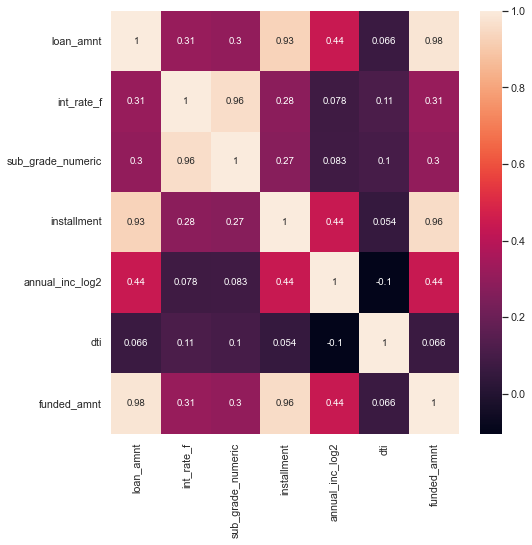

In [299]:
fig=plt.figure(figsize=(8, 8), dpi=70, facecolor='w', edgecolor='k')
sns.set(style="darkgrid")
sns.heatmap(loan_data_corr, annot=True, annot_kws={"size": 10})
plt.show()

# Observation

* From the above , it is clear that int_rate, sub grades and grades are related strongly.
* For analysis, we will drop 'Grade' and 'Subgrade' and use Interest.


# Delete Unnecessary cols

The following are the main assumptions -

* Columns that have unique values for each of the observation are dropped.These are system identifiers provided to the applications. For example 'id','member_id'
* Columns that do not add any value to the Analysis are dropped, for example - 'last_pymnt_amnt'
* Columns that are generally not the cause ( but are effect) of loan status are dropped, for example 'total_rec_prncp'
* Columns that are highly correlated to the other variables are dropped for example 'grade','sub_grade','int_rate'
* Columns that have been cleaned and derived for example - int_rate_f is derived from int_rate, similarly, 'income verification' and 'source verification' derived from 'verification status'

In [300]:
#Drop columns that do not add any weight to the analysis
loan_data.drop(columns=['member_id','funded_amnt_inv','grade','sub_grade','emp_title',
                        'issue_d','url','desc','int_rate','open_acc','revol_bal','total_acc',
                       'purpose','title','zip_code','addr_state','earliest_cr_line',
                       'earliest_cr_line_dt','time_delta','out_prncp','out_prncp_inv','total_pymnt',
                       'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                       'recoveries','collection_recovery_fee','last_pymnt_amnt','city_code',
                        'last_credit_pull_d', 'last_credit_pull_dt','sub_grade_numeric','earliest_cr_line_dt_fine',
                       'last_pymnt_d','verification_status'],
                        axis=1,inplace=True)

In [301]:
# Extract fully paid and charged off loans for Segmented analysis
loan_data_extract=loan_data[loan_data['loan_status']!='current']
# Check Size and print few observations
print(loan_data_extract.shape)

(38523, 26)


<AxesSubplot:>

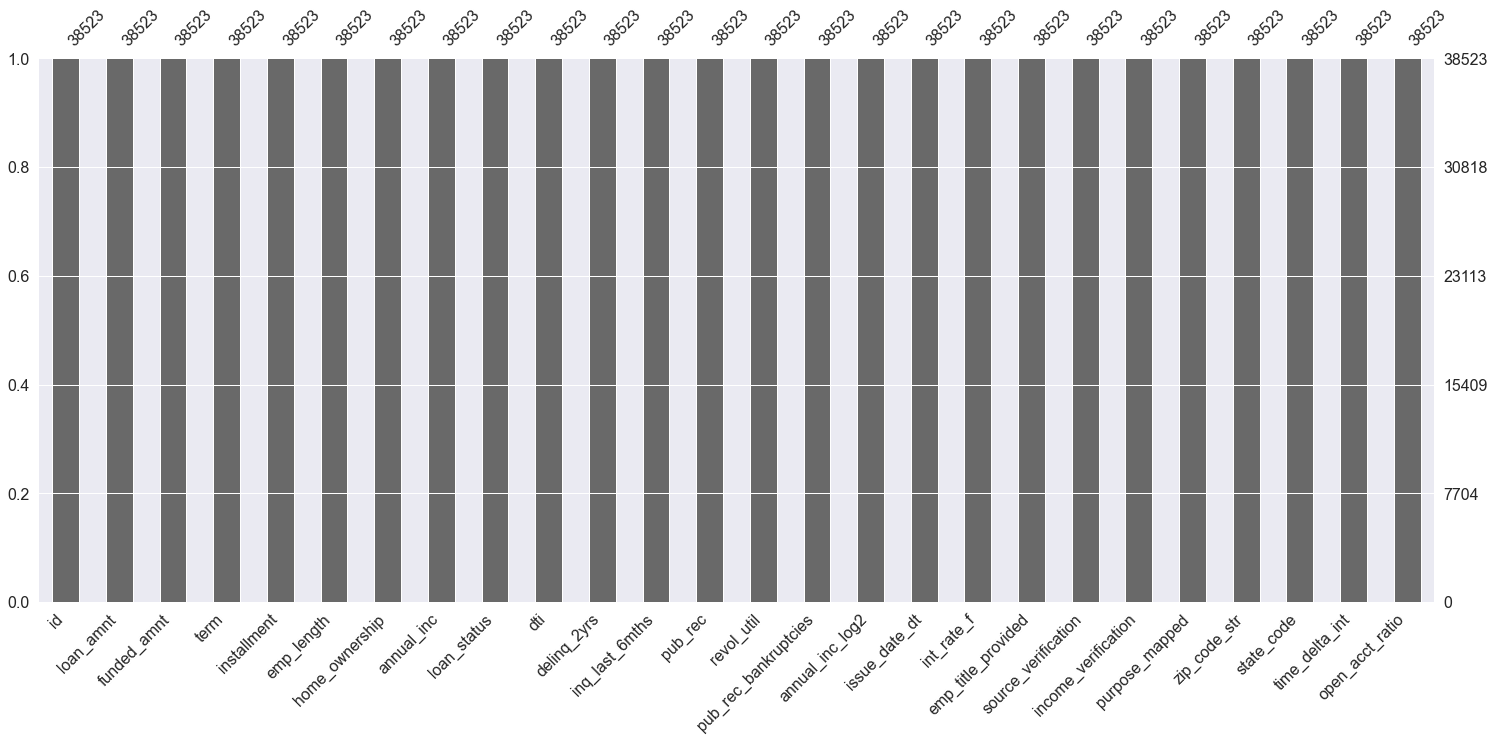

In [302]:
# Check the missing numbers
msno.bar(loan_data_extract)

# Univeriate Analysis and Segmented Analysis

Following the data Cleaning exercise, Univeriate and Segmented Analysis is done. Each Variable is considered
at a time and analysis is done. Box plots, Count plot or percentage stacked plot are employed as applicable.

In [303]:
# Write a function to display subplots of box plot for given variables.
def box_plot(k,fx=16,fy=8):
    fig=plt.figure(figsize=(fx, fy), dpi=70, facecolor='w', edgecolor='k')
    sns.set(style="darkgrid")
    i=1
    for col in k:
        plt.subplot(2,3,i)
        sns.boxplot(y=col,
                    x='loan_status',
                palette='pastel',
                data=loan_data_extract)
        i=i+1

plt.show()

In [304]:
# Write a function to display subplots of bar plot for given variables.
def count_plot(k,fx=16,fy=8):
    fig=plt.figure(figsize=(fx, fy), dpi=90, facecolor='w', edgecolor='k')
    sns.set(style="darkgrid")
    i=1
    for col in k:
        plt.subplot(2,3,i)
        plt.xticks(rotation='vertical')
        ax=sns.countplot(y=col,
            data=loan_data_extract,
            palette='pastel',
            order=loan_data_extract[col].value_counts().index)  
        i=i+1
    
    
plt.show()

In [305]:
# Write a function to display a percentage stacked plot of passed variable aganist the Loan Status
def stacked_plot(a,b,fx=10,fy=8):
    x_value=a
    labl=b
    loan_data_extract_totals=loan_data_extract.groupby(by=[x_value,'loan_status'])['loan_amnt'].count().reset_index()
    loan_analysis_totals=pd.pivot_table(loan_data_extract_totals,values='loan_amnt',index=x_value,columns='loan_status').reset_index()
    
    r = range(len(loan_analysis_totals[x_value]))
    
    loan_total = [i+j for i,j in zip(loan_analysis_totals['charged off'],loan_analysis_totals['fully paid'])]
    loan_chgoff = [i / j * 100 for i,j in zip(loan_analysis_totals['charged off'], loan_total)]
    loan_paid = [i / j * 100 for i,j in zip(loan_analysis_totals['fully paid'], loan_total)]
     
    df_percents=pd.DataFrame({x_value:loan_analysis_totals[x_value],'Charged_off_perc':loan_chgoff,'Fully_paid_p':loan_paid})
    #print(df_percents)
    
    sns.set(style="ticks")
    col_mat=['b','r','g','y','c','m']
    m=np.random.randint(1,5)
    
    #ax=df_percents.plot.bar(stacked=True,figsize=(fx,fy),color=sns.color_palette("hls", 8))
    ax=df_percents.plot.bar(stacked=True,figsize=(fx,fy),color=[col_mat[m],col_mat[m-1]])
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if height!=0:
            ax.annotate('{:.2f} %'.format(height), (p.get_x()+.25*width, p.get_y()+.5*height),ha='left',va='center',
                    rotation='vertical',
                    size='smaller')   
       
    plt.xticks(r,loan_analysis_totals[x_value],rotation='vertical')
    plt.xlabel(labl)
    plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
    plt.show()

# Analyse Loan Amount - The amount customer has requested

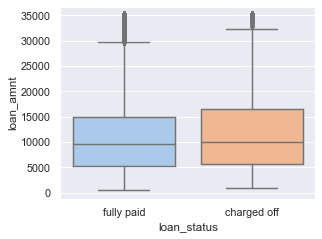

In [306]:
box_plot(['loan_amnt'])

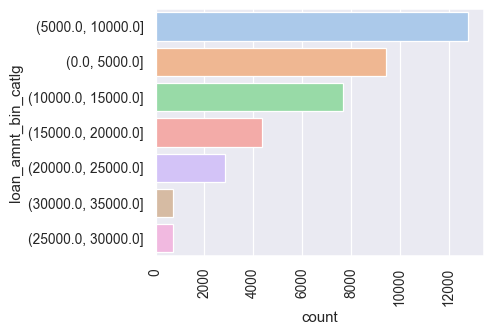

In [307]:
# Bin the loan amount into buckets and chart the plots 
loan_data_extract['loan_amnt_bin_catlg'] = pd.cut(loan_data_extract['loan_amnt'], np.linspace(0, 35000, 8))
count_plot(['loan_amnt_bin_catlg'])

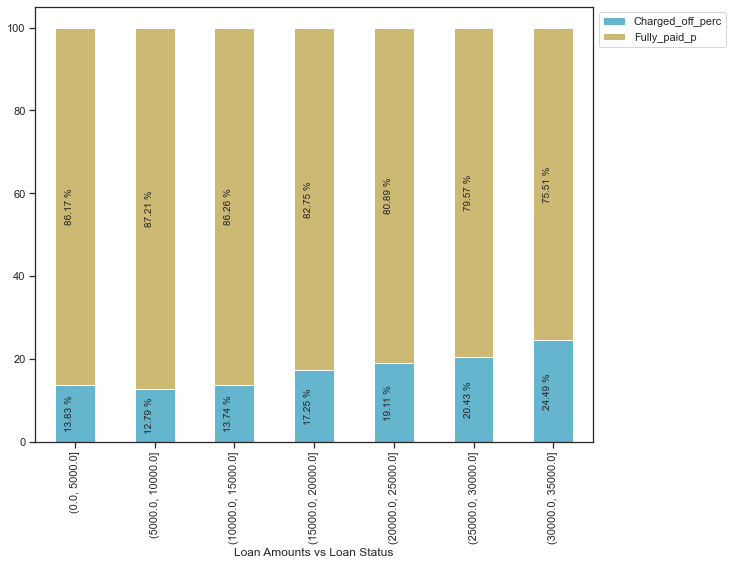

In [308]:
stacked_plot('loan_amnt_bin_catlg','Loan Amounts vs Loan Status')

# Observation

In general, as the loan amount is increasing, the percentage of the charged off loans is increasing.
The percentage of Charged off loans is highest for the loam amounts in range 30000 - 35000. But, the number of loans in this category are less.
From the count plot, the highest number of loans is for 5000 - 10000, followed by 0 - 5000 and 10000 - 15000. With in top 3 high volume categories, the laons that all with in 0 -5000 are slightly likely to be charged off

# Analyse impact of Funded Amount on Loan Status

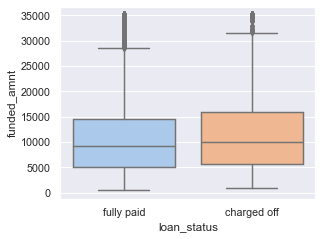

In [309]:
box_plot(['funded_amnt'])

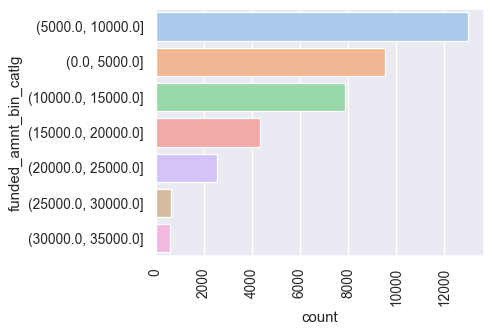

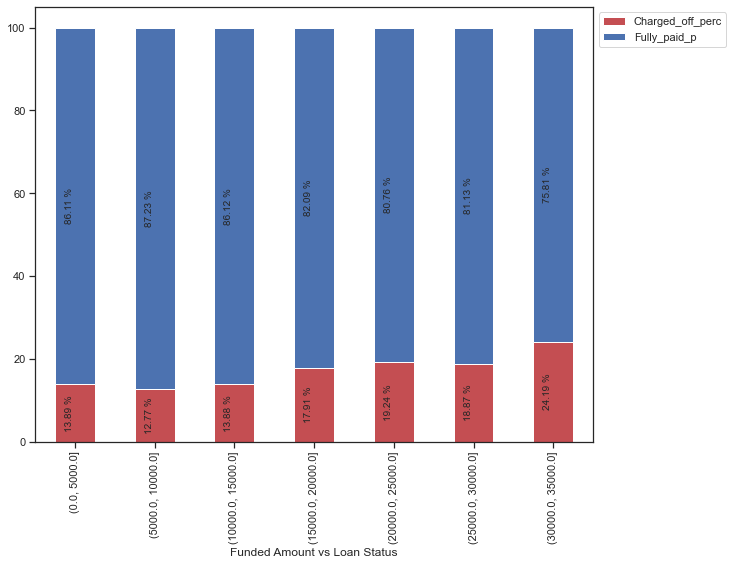

In [310]:
# Bin the funded amount and chart the plots
loan_data_extract['funded_amnt_bin_catlg'] = pd.cut(loan_data_extract['funded_amnt'], np.linspace(0, 35000, 8))
count_plot(['funded_amnt_bin_catlg'])
stacked_plot('funded_amnt_bin_catlg','Funded Amount vs Loan Status')

# Observation

The trend of funded Amount closely matches the loan amount. Both these values are stringly correlated.

Note:
    
    
An interesting analysis - check the trend of charged off loans when the funded amount is less than the amount applied for,
by the applicant.

In [311]:
# Create a flag to indicate if the funded amount is same as Applicant requested Amount
loan_data_extract['full_amnt_given'] = np.where(loan_data_extract['loan_amnt'] == loan_data_extract['funded_amnt'], True, False)
loan_data_extract['full_amnt_given'] = loan_data_extract['full_amnt_given'].apply(lambda x:'Issued Applied Amount' if x is True else 'Issued Reduced Amount')

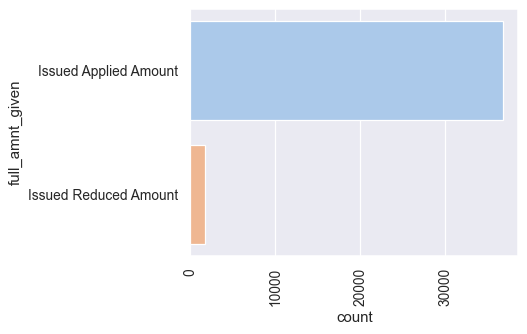

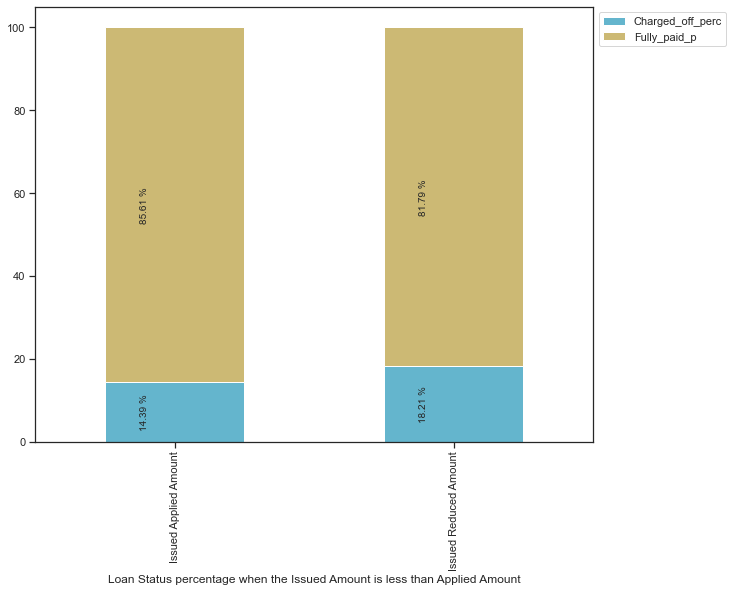

In [312]:
count_plot(['full_amnt_given'])
stacked_plot('full_amnt_given','Loan Status percentage when the Issued Amount is less than Applied Amount')

### Observation
From the charts, it is evident that applications that have Funded Amount less than the customer applied amount, are marginally likely <br>
to be charged off. 

## Term - Tenure of the loan - 36 Months or 60 Months 

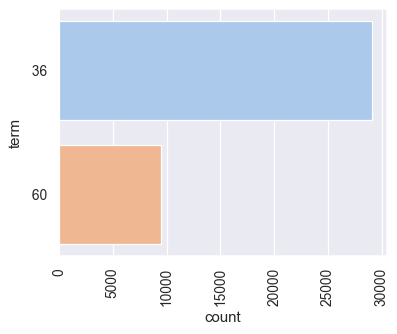

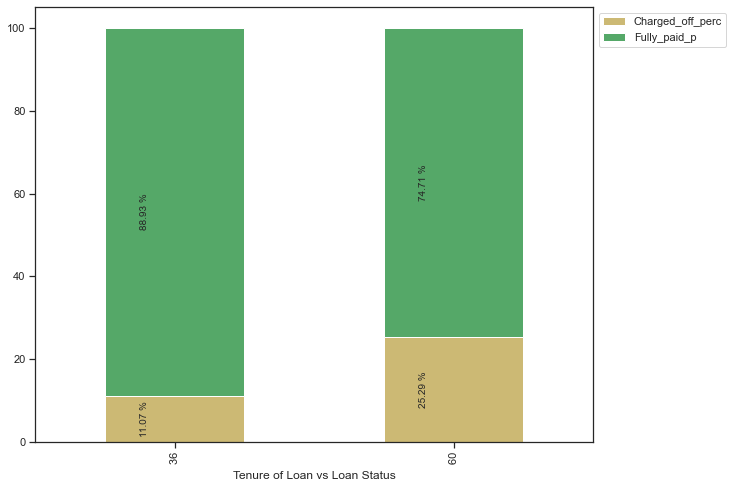

In [313]:
count_plot(['term'])
stacked_plot('term','Tenure of Loan vs Loan Status')

### Observation 
Loans with longer tenure have high percentage of Charge Off applications. This indicates that customers who have longer <br>
commitments opted charge off due to varying financial circumstances over the time.

# Interest Rate of the loan

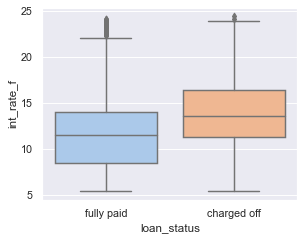

In [314]:
box_plot(['int_rate_f'])

In [315]:
# Bin the Interest Rates into categories and chart the plot.
loan_data_extract['int_rate_bin']=pd.cut(loan_data_extract['int_rate_f'], np.linspace(5, 25, 5))

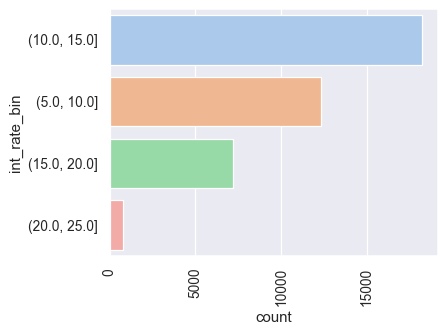

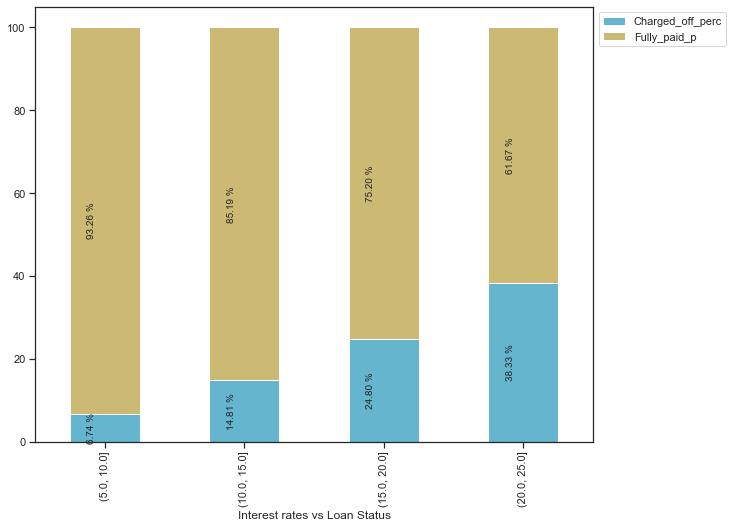

In [316]:
count_plot(['int_rate_bin'])
stacked_plot('int_rate_bin','Interest rates vs Loan Status')

### Observation
In general, the higher the interest rate is, the higher is the percentage of Charged off Loans. <br>
Loans with in interest rate 10 -15 are most frequent, followed by those with  5-10 and 15-20.<br>
However, the percentage of chareged Offs is high in 10-15, followed by 5-10. <br>
This analysis evidences, that there is some risk in issuing the High Interest Loans and additional due deligence is required while processing loan applications

## Analyse Dti - Debit to Income Ratio 

In [317]:
# Bin the DTI into categories and chart the plots.
loan_data_extract['dti_bin']=pd.cut(loan_data_extract['dti'], np.linspace(0, 30, 7))

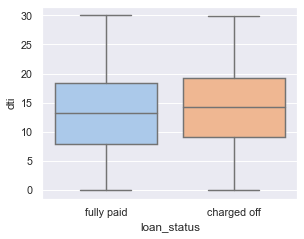

In [318]:
box_plot(['dti'])

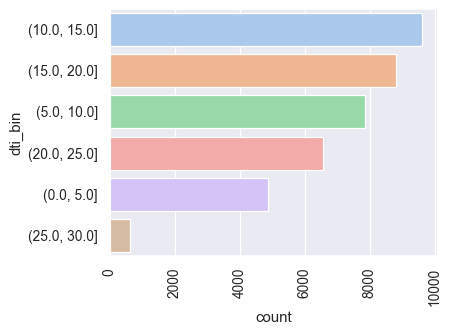

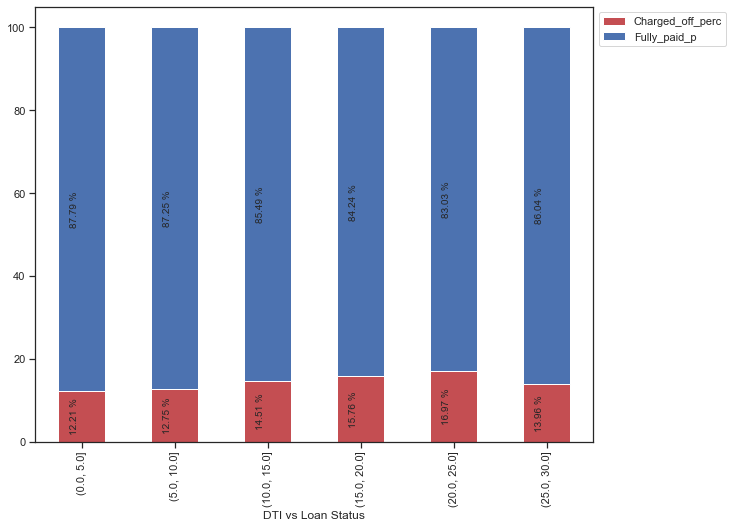

In [319]:
count_plot(['dti_bin'])
stacked_plot('dti_bin','DTI vs Loan Status')

### Observation
The percentage of charged off loans is increasing as the dti increases.<br>
Also, from box plot, it is evident,that dti is higher in charged off loans. <br>
While dti in 10-15 is frequent observation, the percentage of charge offs are higher in 15-20. <br>
This evidences, that high dti meant a risky loan application.

## Analyse Credit History - The difference in the issue date and earliest credit date 

In [320]:
# Bin the calculated credit age and then chart the plot
loan_data_extract['time_delta_bin'] = pd.cut(loan_data_extract['time_delta_int'], np.linspace(2, 65, 22))

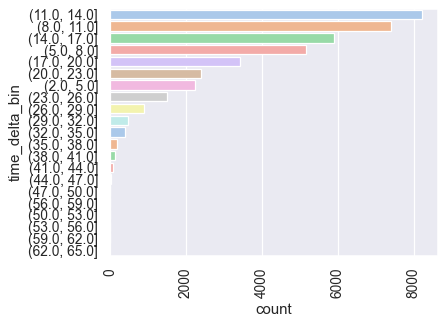

In [321]:
count_plot(['time_delta_bin'])
# stacked_plot('time_delta_bin','Credit History in Years vs Loan Status')

### Observations
There is a mixed trend in the charged off loans when plotted against the credit age. <br>
In general, a very low credit age meant, the financial profile of the applicant is not clear. <br>
A high credit age meant, the financial profile of the applicant is superseded by the age of the application. <br>
This trend is clearly visible in the above percentage stacked plot.

## Analyse Home Ownership Status and its impact on Loan Status

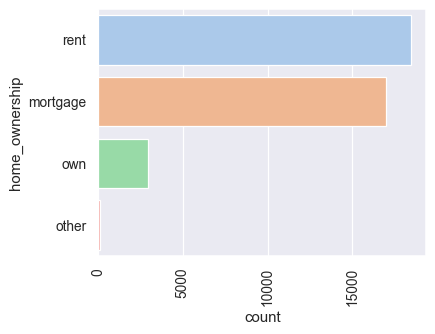

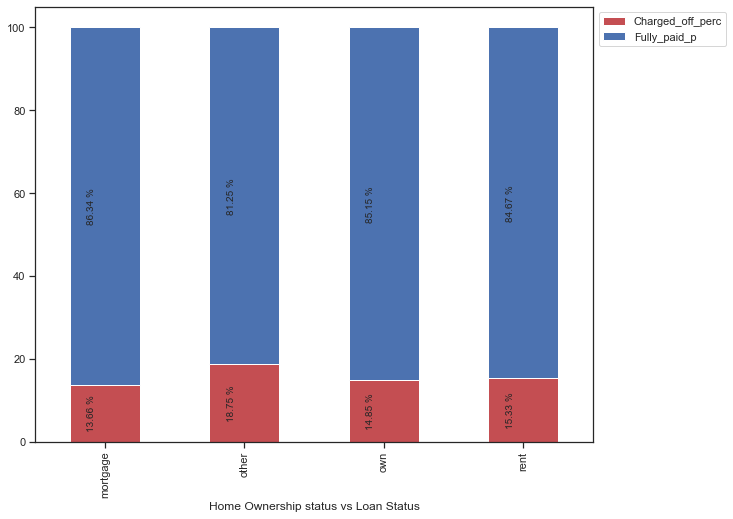

In [322]:
count_plot(['home_ownership'])
stacked_plot('home_ownership','Home Ownership status vs Loan Status')

### Observation
The home ownership with 'other' are charging off the loans at higher rate. <br>
This shows that 'other' category of the home ownership should be identified as risk. Further checks are required to understand <br>
the residency status.

## Analyse Annual Income impact on Loan Status

In [323]:
#Bin the Annual Income and chart the plots.
loan_data_extract['annual_inc_bin'] = pd.cut(loan_data_extract['annual_inc_log2'], np.linspace(10, 23, 5))

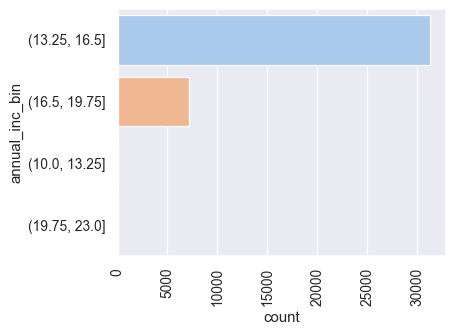

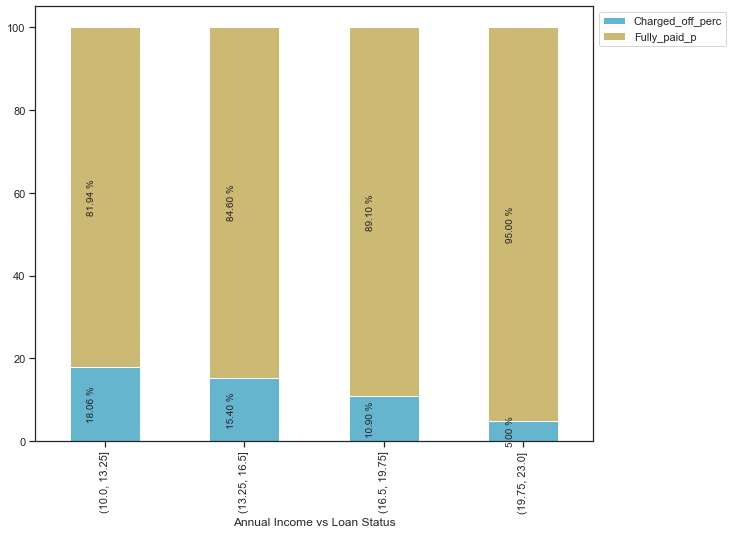

In [324]:
count_plot(['annual_inc_bin'])
stacked_plot('annual_inc_bin','Annual Income vs Loan Status')

### Observation
The general trend is, as the annual income increases, the percentage of charged off loans decreases. <br>
This is eveident from the fact that loans in the range 16.5 - 19.75 have lower charged off percentage compared to 13.25 - 16.5 <br>
which is highly frequent.

## Analyse Year of Issue and trend of charged off loans

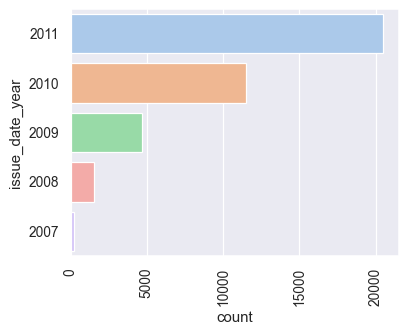

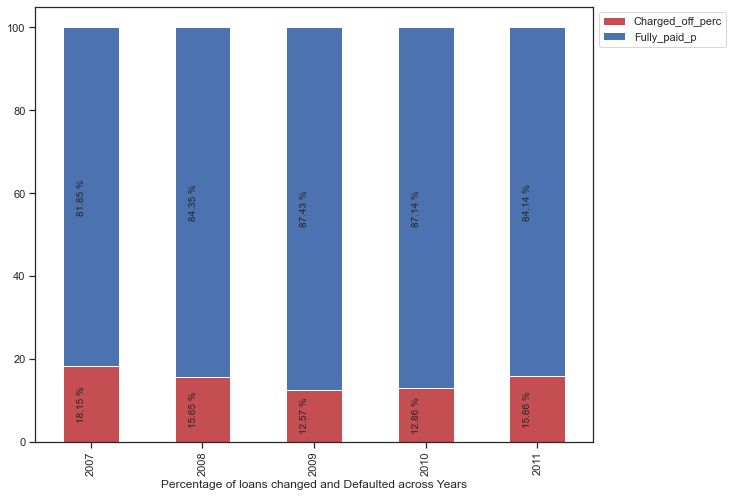

In [325]:
# Extract the year from formatted Issue date and chart the plots for analysis
loan_data_extract['issue_date_year']=loan_data_extract['issue_date_dt'].dt.year
loan_data_extract['issue_date_year']=loan_data_extract['issue_date_year'].astype(str)
count_plot(['issue_date_year'])
stacked_plot('issue_date_year','Percentage of loans changed and Defaulted across Years')

### Observation 

The number of loans gradually increased from 2007 till 2011 <br>
However, the percentage of the charge off loans issued have reduced from 2007 till 2010. <br>
In 2011, there is high charge off rate. This could be partly due to number of loans issued. <br> 
Further analysis will be required to draw any conclusions on this behavior. 

### Analyse pub_rec - Number of derogatory comments on the credit file

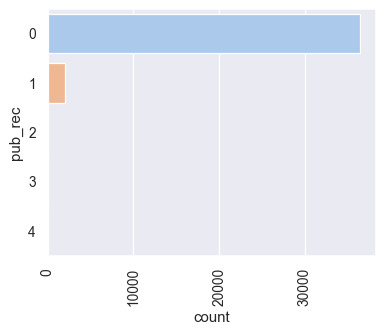

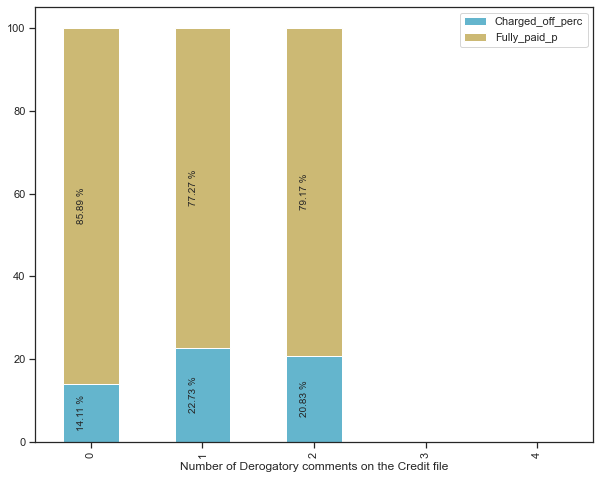

In [326]:
loan_data_extract.pub_rec=loan_data_extract.pub_rec.astype(str)
count_plot(['pub_rec'])
stacked_plot('pub_rec','Number of Derogatory comments on the Credit file')

### Observation

It is evident from the above chart that, the higher the derogatory comments are, the higher is the charge off rate.

### Analyse pub_rec_bankruptcies - Number of public bankruptcies on the credit file

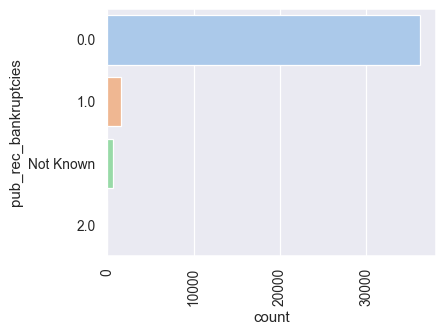

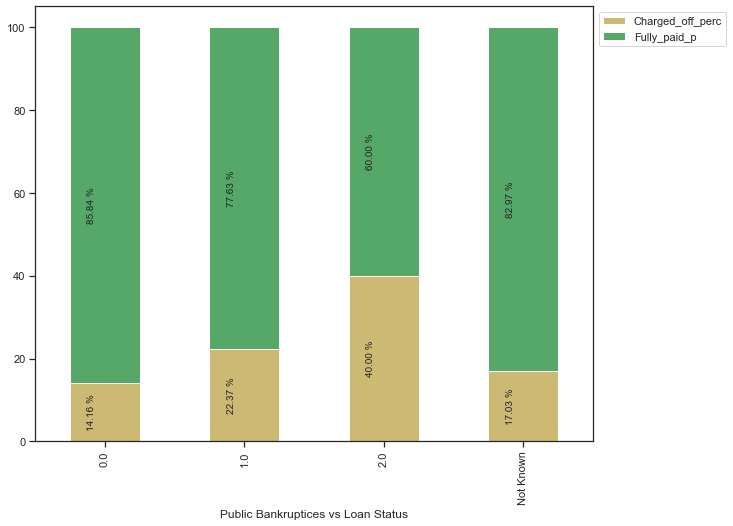

In [327]:
count_plot(['pub_rec_bankruptcies'])
stacked_plot('pub_rec_bankruptcies','Public Bankruptices vs Loan Status')

### Observation
It is evident from the above chart that, the higher the bankruptcies are, the higher is the charge off rate.

### Analyse Source and Income Verification

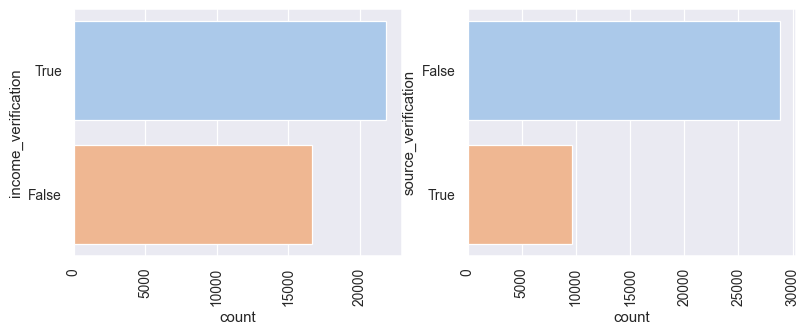

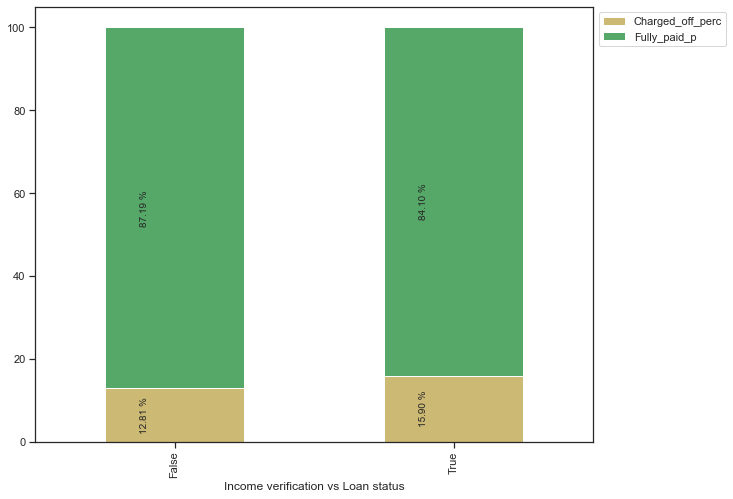

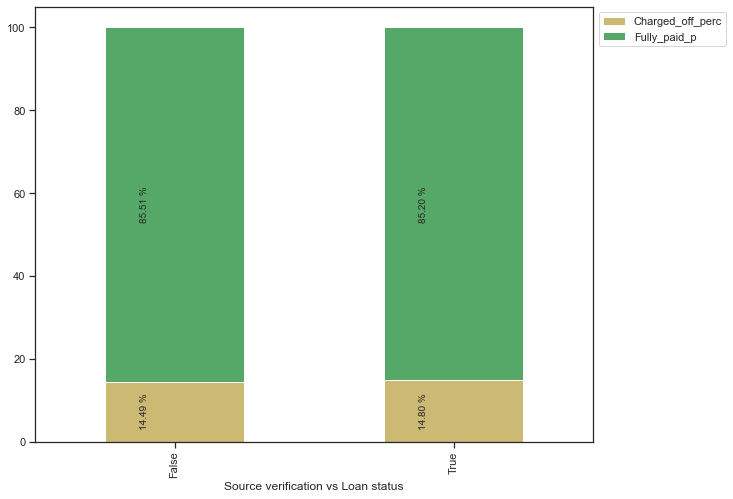

In [328]:
count_plot(['income_verification','source_verification'])
stacked_plot('income_verification','Income verification vs Loan status')
stacked_plot('source_verification','Source verification vs Loan status')

### Observation


In the analysis of Source Verification, apparently there is no effect on the charged off rate, even though there is stark difference in the counts.<br>
In case of Income verification, the charge off rate is higher ,when the income has been verified.<br>
This shows, that income verification checks have no effect in case of Risky applications. The income verification process <br>
will need to be reviewed.

### Analyse Purpose mentioned by customer on the application

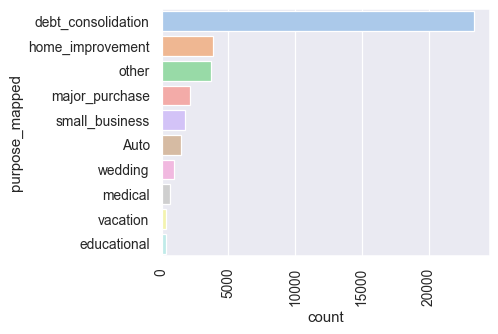

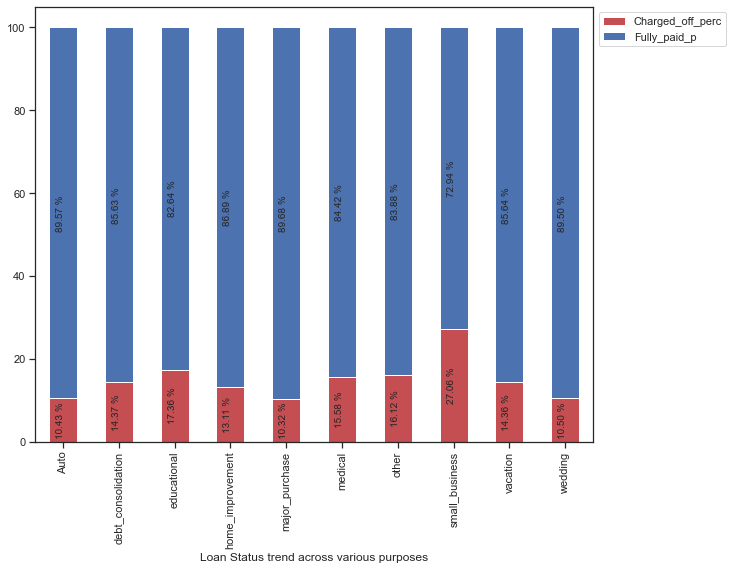

In [329]:
count_plot(['purpose_mapped'])
stacked_plot('purpose_mapped','Loan Status trend across various purposes')

### Observation
In general, the unsecured loans - like the small business loans, followed by educational loans are highly charged off. <br>
Debit Consolidation is the most common purpose

### Analyse the employee title diclosure impact on loan status

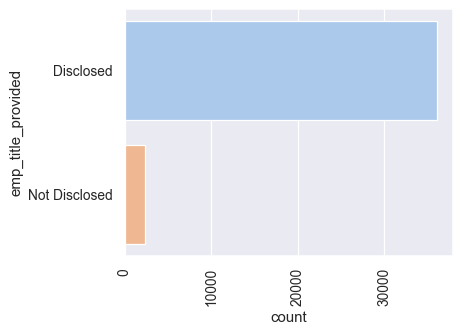

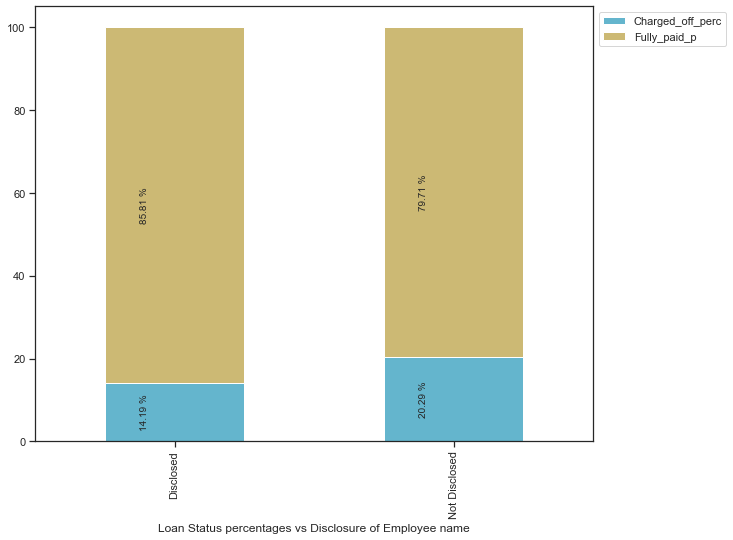

In [330]:
count_plot(['emp_title_provided'])
stacked_plot('emp_title_provided','Loan Status percentages vs Disclosure of Employee name')

### Observation

Apparently, the rate of charged off applications are higher in cases, where the Employee title was not disclosed.<br>
However, the 'Not Disclosed' is much less compared to 'Disclosed' category and that could have some bearing on this trend. <br>
Further Analysis will be required on Employee title to draw logical conclusions.

### Analyse the trend of Inquiries in past 6 months 

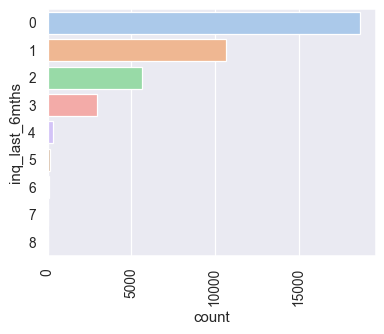

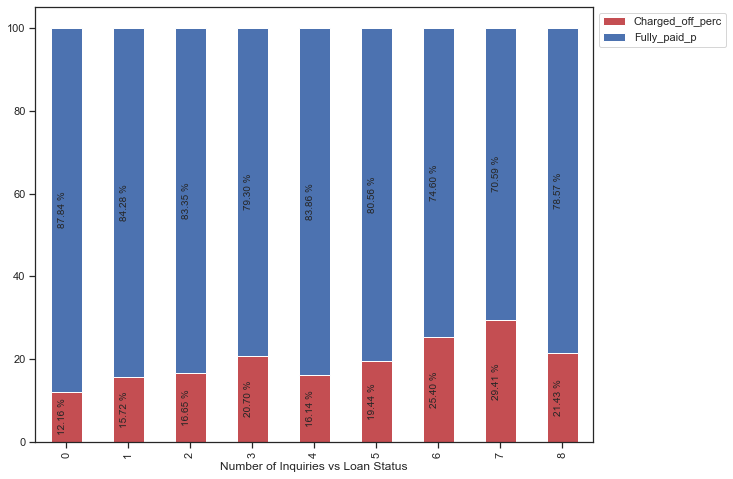

In [331]:
loan_data_extract.inq_last_6mths=loan_data_extract.inq_last_6mths.astype(str)
count_plot(['inq_last_6mths'])
stacked_plot('inq_last_6mths','Number of Inquiries vs Loan Status')

### Observation

Considering both the count plot and stacked percentage plot, it is evident that, the higher the number of inquiries, the higher <br>
is the rate of charge off.  This parameter shows the desperation of the customer for a credit line.

### Analyse the Employment Length vs Loan status

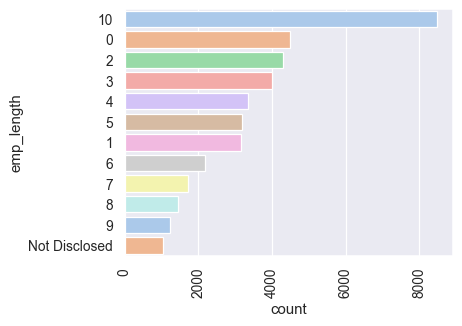

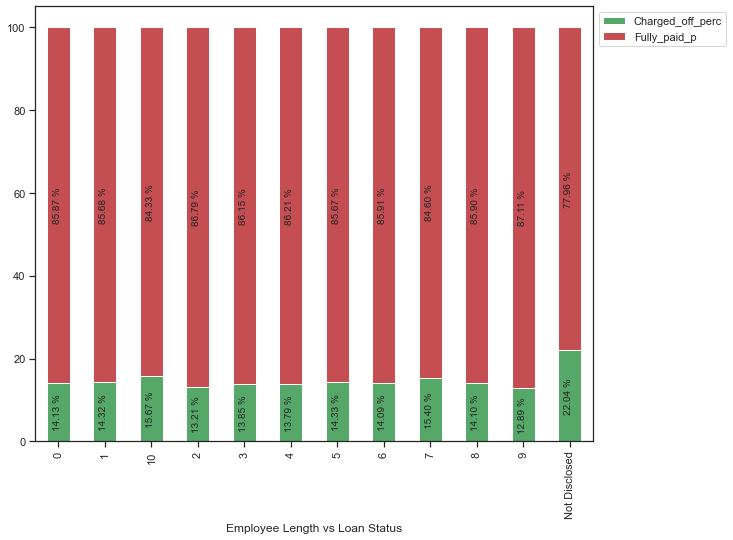

In [332]:
loan_data_extract.emp_length=loan_data_extract.emp_length.astype(str)
count_plot(['emp_length'])
stacked_plot('emp_length','Employee Length vs Loan Status')

### Observation

There is no clear trend of employment length impact on the charged off rate. Further investigation will be required to study <br>
this variable

### Analyse the trend of Installment across the loan status

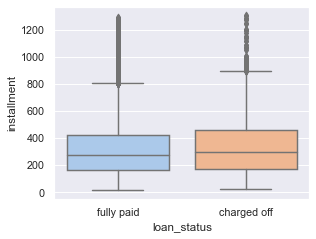

In [333]:
box_plot(['installment'])

In [334]:
#Bin the log of installements into ranges and chart the plots.
loan_data_extract['installment_bin'] = pd.cut(np.log2(loan_data_extract['installment']), np.linspace(3.5, 10.5, 8))

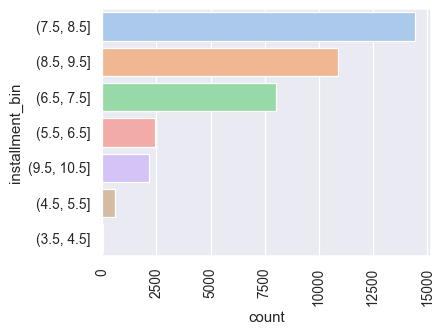

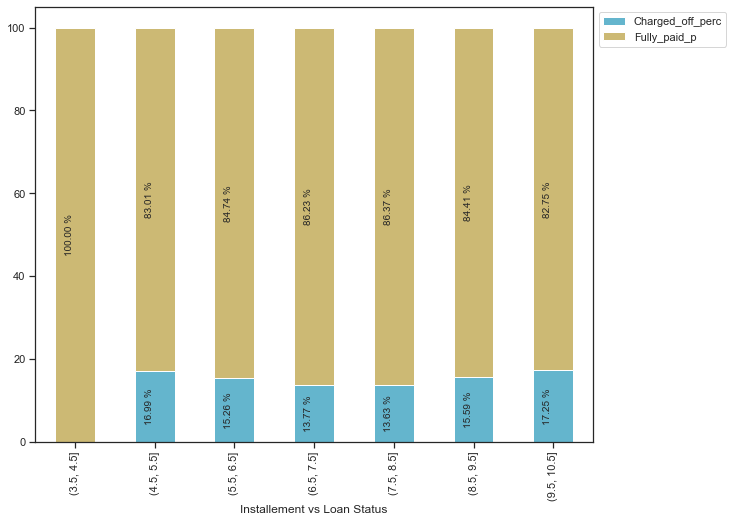

In [335]:
count_plot(['installment_bin'])
stacked_plot('installment_bin','Installement vs Loan Status')

### Observation 

From both the count plot and stacked plot it is evident that as the instalment increases, the rate of charge off loans increases.<br>
Loans with instalments in range 7.5 - 8.5 are common followed by 8.5 - 9.5 and 6.5 - 7.5. <br>
Rate of charge off is marginally higher in 8.5 - 9.5

### Analyse Open Account Ratio vs Loan Status

In [336]:
loan_data_extract['open_acct_ratio_bin'] = pd.cut(loan_data_extract['open_acct_ratio'], np.linspace(0, 1, 6))

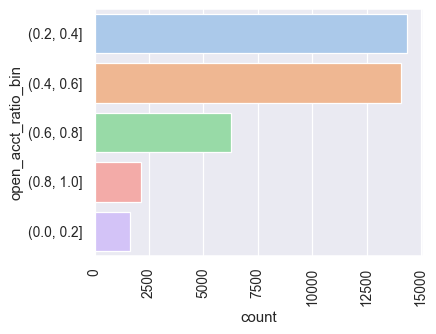

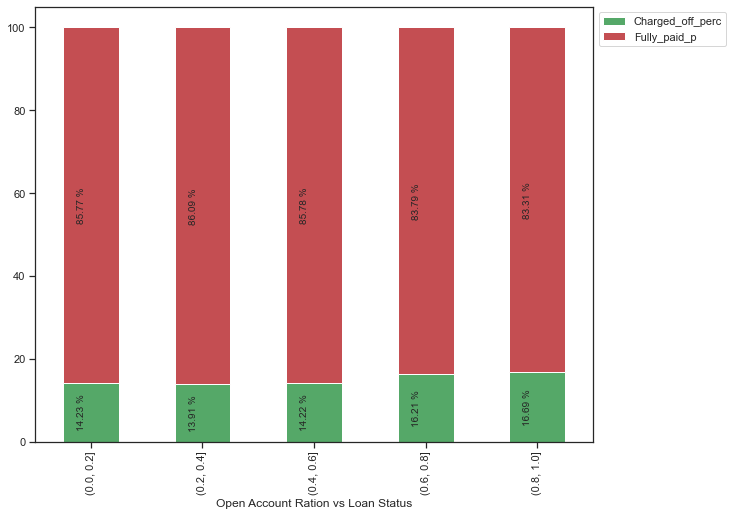

In [337]:
count_plot(['open_acct_ratio_bin'])
stacked_plot('open_acct_ratio_bin','Open Account Ration vs Loan Status')

### Observation

From the above chart, it is evident that Bank is not issuing the loans to applicants who have higher open account ratio. <br>
The general trend is, the higher the open account ratio is, the higher the chance of charging off loan

### Analyse Revolving Balance Utilization Rate

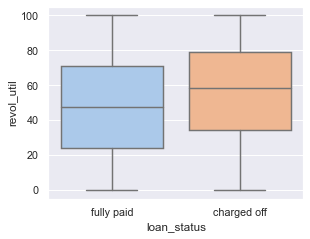

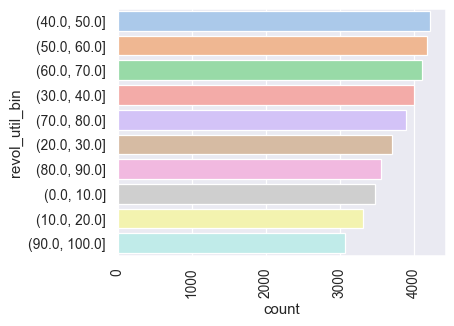

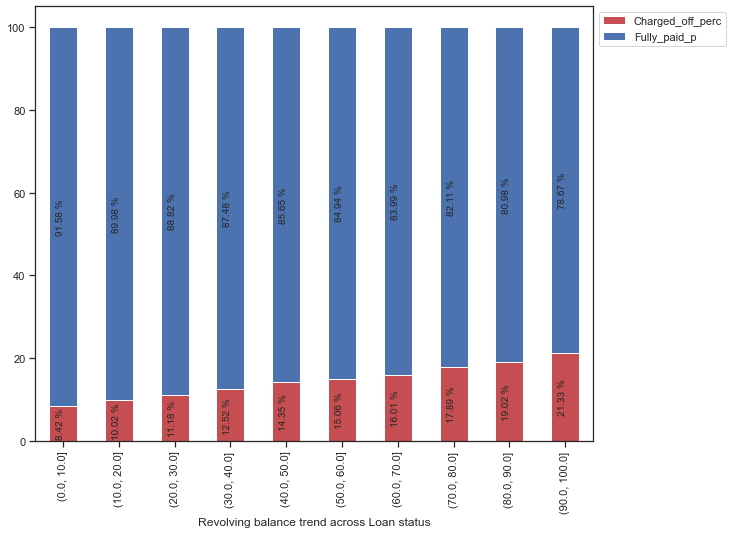

In [338]:
box_plot(['revol_util'])
loan_data_extract['revol_util_bin'] = pd.cut(loan_data_extract['revol_util'], np.linspace(0, 100, 11))
count_plot(['revol_util_bin'])
stacked_plot('revol_util_bin','Revolving balance trend across Loan status')

### Observation

From the box plot and count plot, it is evident that, revolving balance utilization is higher in charged off loans. <br>
Customers with considerable revolving balance (40 - 50) are top applicants. They are also having the high percentage of <br>
charge off loans compared with applicants with utilization rate less than 40.<br>
This general trend is  - the higher the revolving balance utilization rate, the higher is the chance of charging off loan.


### Analyse Loan trend across the state and Zip Codes

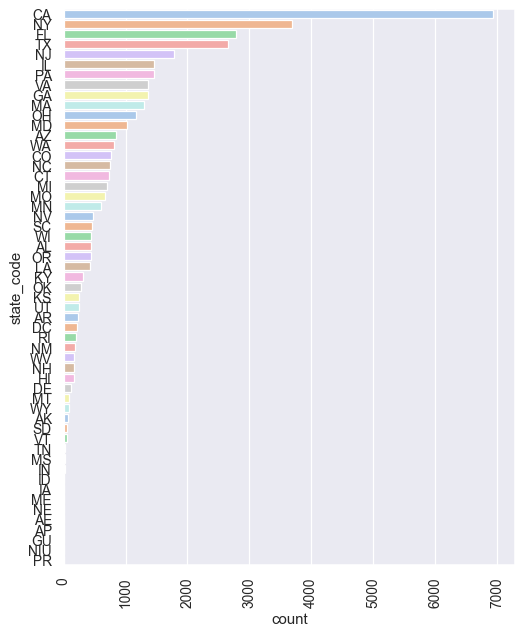

In [339]:
count_plot(['state_code'],22,18)

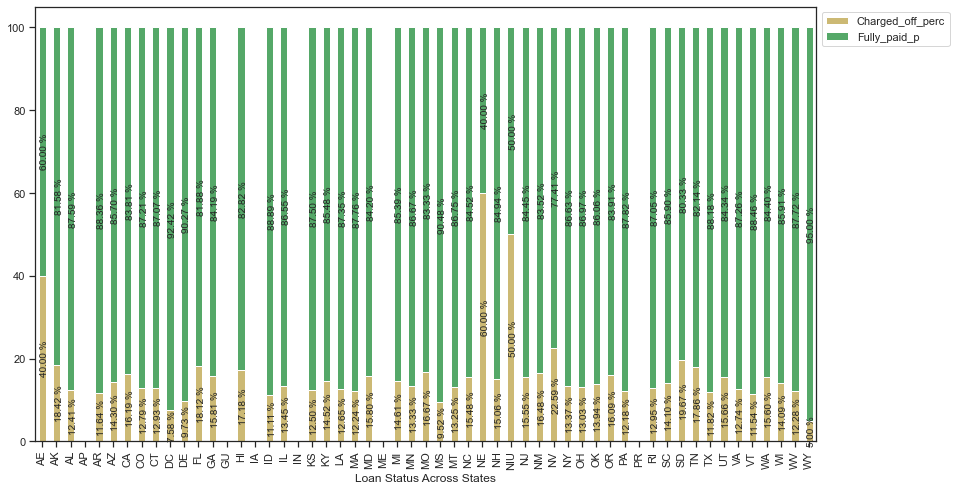

In [340]:
stacked_plot('state_code','Loan Status Across States',14,8)

### Observation

As per the above state 'CA' has highest number of charged off applications. <br>
In terms of percentages, the loans are highly charged off in the state NE,NIU and AE. <br>
Observing the number of loans applied from each of these states, it is clear, that the number of applications are less and hence<br>
this behavior. Excluding the above outlier behavior, the state with highest charged off percentage is NV - Nevada.

### Analyse further on the zip codes and state codes

In [341]:
# take those states and zip codes, that have applciations mroe than 200. Calculate the percentage of charged off loans
temp_dataframe=loan_data_extract.groupby(by=['state_code','zip_code_str','loan_status']).count().reset_index()[['state_code','zip_code_str','loan_status','loan_amnt']]
temp_dataframe=pd.pivot_table(temp_dataframe,values='loan_amnt',index=['state_code','zip_code_str'],columns=['loan_status']).reset_index()
temp_dataframe=temp_dataframe[temp_dataframe['charged off']+temp_dataframe['fully paid'] >= 200]
temp_dataframe['charged off perc']=temp_dataframe['charged off']/(temp_dataframe['charged off']+temp_dataframe['fully paid'])*100
temp_dataframe=temp_dataframe.sort_values('charged off perc',ascending=False)
temp_dataframe.rename(columns={'loan_status':'Cumulative_Count'}, inplace=True)
temp_dataframe=temp_dataframe.reset_index().rename(columns={'index':'Counts'})
temp_dataframe

loan_status,Counts,state_code,zip_code_str,charged off,fully paid,charged off perc
0,476,NV,891,64.00,177.00,26.56
1,71,CA,917,71.00,269.00,20.88
2,156,FL,331,70.00,267.00,20.77
3,155,FL,330,51.00,198.00,20.48
4,79,CA,925,47.00,185.00,20.26
5,455,NJ,080,45.00,190.00,19.15
6,67,CA,913,50.00,215.00,18.87
7,80,CA,926,67.00,299.00,18.31
8,82,CA,928,34.00,168.00,16.83
9,499,NY,117,49.00,244.00,16.72


### Observation

So with in a state , based on the urban area, the percentage of the defaulted loans is varying. <br> 
For example, with in 'FL' the zip code 331 has highest percentage of the defaulters.

### Analyse the observations using the variable  'delinq_2yrs' 

In [342]:
loan_data_extract.delinq_2yrs=loan_data_extract.delinq_2yrs.astype(str)

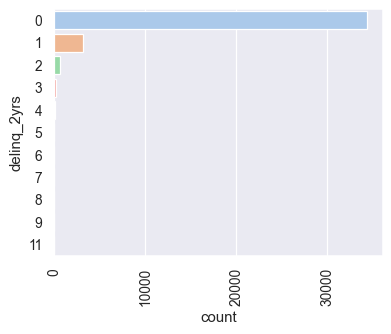

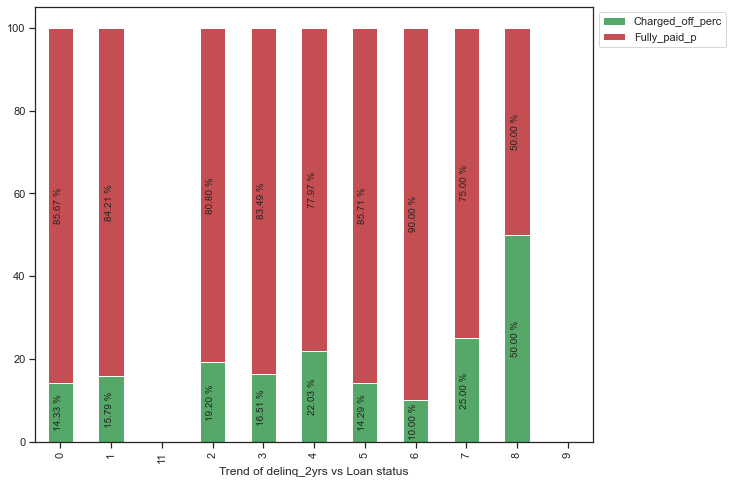

In [343]:
count_plot(['delinq_2yrs'])
stacked_plot('delinq_2yrs','Trend of delinq_2yrs vs Loan status')

### Observation


In general, LC is not accepting the customers with higher count of 'delinq_2years'. <br>
('delinq_2years' - Denotes how many 30+ days past with the incidences of delinquency  in last 2 years) <br>
The general trend is, as the count of variable increases, the percentage of charged off loans increases. <br>
There is a definite chance of charging off loan when the delinq_2years is high. Additional checks are required to understand <br>
the financial profile of the applicant in such cases. 

## Bivariate Analysis

In [344]:
#Extract charged off loans to a seperate Dataframe
loan_data_extract_chgoff=loan_data_extract[loan_data_extract['loan_status']=='charged off']

### Analyse the DTI ratio and Verification Status

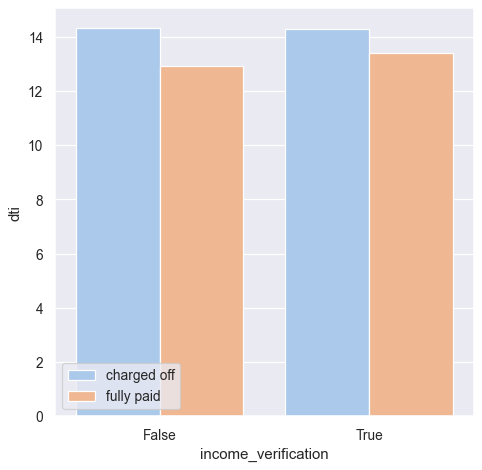

In [345]:
# Chart the plots grouping verification status and loan staus and take median of dti
fig=plt.figure(figsize=(6, 6), dpi=90, facecolor='w', edgecolor='k')
sns.set(style="darkgrid")
sns.barplot(y='dti',x='income_verification',hue='loan_status',
            palette='pastel',
            data=loan_data_extract.groupby(by=['income_verification','loan_status'])['dti'].median().reset_index())
plt.legend(loc='lower left')
plt.show()

#### Observation
From the above it is clear, that in the cases, where Debt to Income ratio is high, the income_verification is not playing a role.
In such cases, verification process should be improved to assess the application. 

### Check how the average DTI acorss the states

<AxesSubplot:xlabel='state_code', ylabel='dti'>

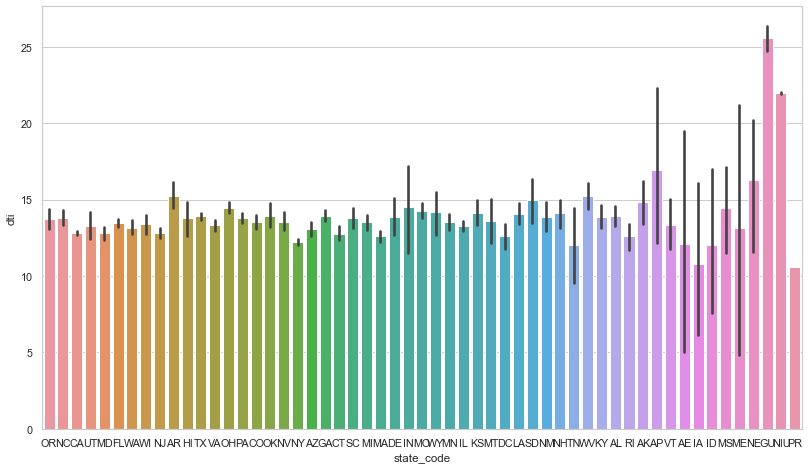

In [346]:
fig=plt.figure(figsize=(14,8), dpi=70, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.set(style="whitegrid")
sns.barplot(x='state_code', y='dti',data=loan_data_extract)

### Observation

The Debit to Income ratio spread across the states. <br>
This shows that the error is higher in the state 'NE' that has highest percentage of chanrged off loans. <br>
The error is minimal in NV.

### Analyse the relation between loan status, home ownership and  dti.

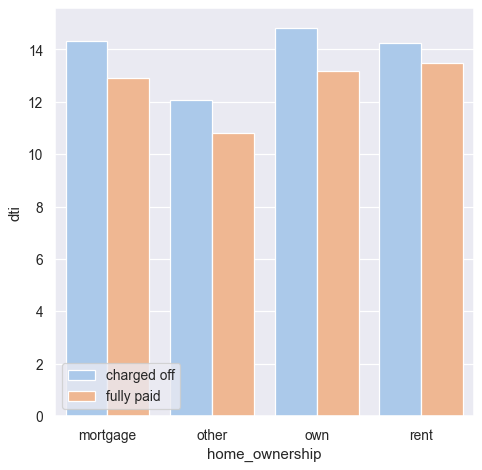

In [347]:
# Chart the plots grouping home owner ship and loan staus and take median of dti
fig=plt.figure(figsize=(6, 6), dpi=90, facecolor='w', edgecolor='k')
sns.set(style="darkgrid")
sns.barplot(y='dti',x='home_ownership',hue='loan_status',
            palette='pastel',
            data=loan_data_extract.groupby(by=['home_ownership','loan_status'])['dti'].median().reset_index())
plt.legend(loc='lower left')
plt.show()

### Observation
If the DTI is higher and the home ownership is 'own', then the percentage of defaulting loan is higher. 

### Determine any correlations from the heat map

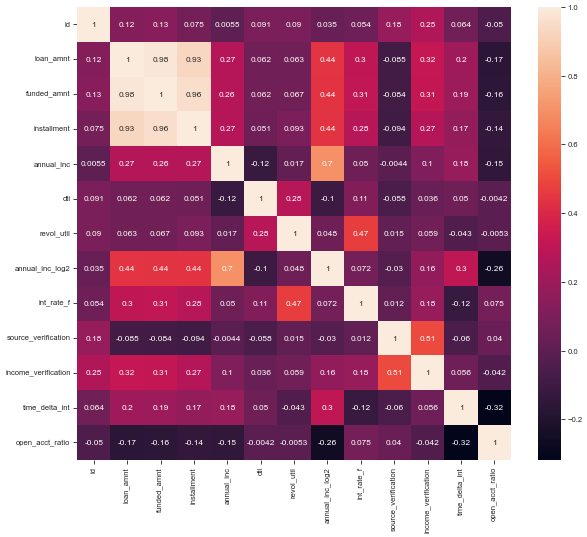

In [348]:
fig=plt.figure(figsize=(14, 12), dpi=50, facecolor='w', edgecolor='k')
sns.set(style="ticks", palette="pastel")
ax = sns.heatmap(loan_data_extract.corr(),annot=True)


### Analyse Annual income vs interest rate impact on the Charged off loans

<AxesSubplot:xlabel='annual_inc'>

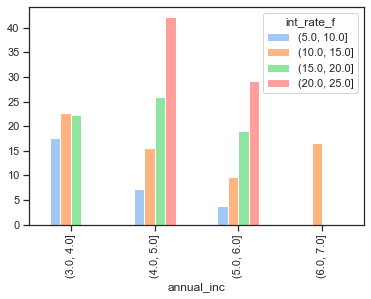

In [349]:
charged_off_income_vs_interest = pd.pivot_table(loan_data_extract_chgoff, 
                                           values='id', 
                                           index=[pd.cut(np.log10(loan_data_extract_chgoff['annual_inc']), np.linspace(3, 7, 5))], 
                                           columns=[pd.cut(loan_data_extract_chgoff['int_rate_f'], np.linspace(5, 25, 5))], 
                                           aggfunc='count', 
                                           dropna=False, 
                                           fill_value=0)

total_income_vs_interest = pd.pivot_table(loan_data_extract,
                                          values='id', 
                                           index=[pd.cut(np.log10(loan_data_extract['annual_inc']), np.linspace(3, 7, 5))], 
                                           columns=[pd.cut(loan_data_extract['int_rate_f'], np.linspace(5, 25, 5))], 
                                           aggfunc='count', 
                                           dropna=False, 
                                           fill_value=0)

charged_off_ratio_income_vs_interest = charged_off_income_vs_interest / total_income_vs_interest * 100
#charged_off_ratio_income_vs_interest.sort_index()
charged_off_ratio_income_vs_interest.plot(kind='bar')

### Observation
It is evident that - 
 - For same interest rate, charge off rate decreases with increase in annual income
 - For same income, charge off increases with increase in interest rate

## Analyse the effect of DTI and Interest Rates vs Loan status

<AxesSubplot:xlabel='dti'>

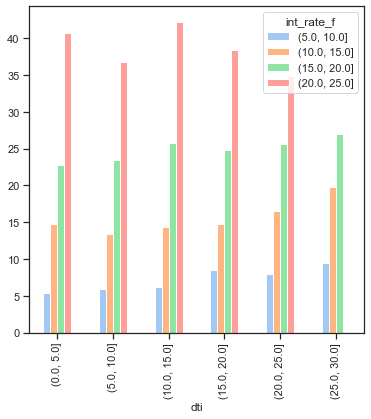

In [350]:
charged_off_dti_vs_interest = pd.pivot_table(loan_data_extract_chgoff, 
                                             values='id', 
                                             index=[pd.cut(loan_data_extract_chgoff['dti'], np.linspace(0, 30, 7))], 
                                             columns=[pd.cut(loan_data_extract_chgoff['int_rate_f'], np.linspace(5, 25, 5))], 
                                             aggfunc='count', 
                                             dropna=False, 
                                             fill_value=0)

total_dti_vs_interest = pd.pivot_table(loan_data_extract, 
                                       values='id', 
                                       index=[pd.cut(loan_data_extract['dti'], np.linspace(0, 30, 7))], 
                                       columns=[pd.cut(loan_data_extract['int_rate_f'], np.linspace(5, 25, 5))], 
                                       aggfunc='count', 
                                       dropna=False, 
                                       fill_value=0)

charged_off_ratio_dti_vs_interest = charged_off_dti_vs_interest / total_dti_vs_interest * 100
#charged_off_ratio_dti_vs_interest.sort_index()
charged_off_ratio_dti_vs_interest.plot(kind='bar',figsize=(6,6))

### Observation
Apparently, for the same dti, higher interest rates result in more charge-offs<br>
Higher interest rates have significant impact on charge offs

## Annual income vs DTI

<AxesSubplot:xlabel='annual_inc'>

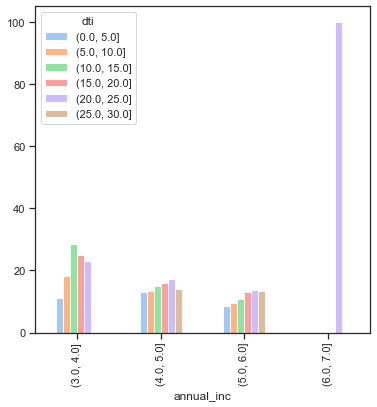

In [351]:
charged_off_income_vs_dti = pd.pivot_table(loan_data_extract_chgoff, 
                                        values='id', 
                                        index=[pd.cut(np.log10(loan_data_extract_chgoff['annual_inc']), np.linspace(3, 7, 5))], 
                                        columns=[pd.cut(loan_data_extract_chgoff['dti'], np.linspace(0, 30, 7))], 
                                        aggfunc='count', 
                                        dropna=False, 
                                        fill_value=0)

total_income_vs_dti = pd.pivot_table(loan_data_extract, values='id', 
                                           index=[pd.cut(np.log10(loan_data_extract['annual_inc']), np.linspace(3, 7, 5))], 
                                           columns=[pd.cut(loan_data_extract['dti'], np.linspace(0, 30, 7))], 
                                           aggfunc='count', 
                                           dropna=False, 
                                           fill_value=0)

charged_off_ratio_income_vs_dti = charged_off_income_vs_dti / total_income_vs_dti * 100
#charged_off_ratio_income_vs_dti.sort_index()
charged_off_ratio_income_vs_dti.plot(kind='bar',figsize=(6,6))

### Observation
- Charge off increases when DTI increases for same annual income
- Charge off decrease when salary increase for same annual income

### Analyse the Relationship of employment length/title Disclosure and Income Verification vs loan status

In [352]:
loan_data_extract['emp_length_disclosed'] = np.where(loan_data_extract['emp_length'] == 'Not Disclosed', False, True)
loan_data_extract_chgoff['emp_length_disclosed'] = np.where(loan_data_extract_chgoff['emp_length'] == 'Not Disclosed', False, True)

<AxesSubplot:xlabel='emp_length_disclosed,emp_title_provided'>

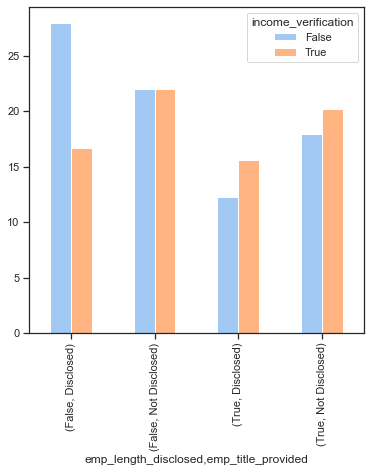

In [353]:
charged_off_rogue = pd.pivot_table(loan_data_extract_chgoff, 
                                   values='id', 
                                   index=['emp_length_disclosed','emp_title_provided'], 
                                   columns=['income_verification'], 
                                   aggfunc='count', 
                                   dropna=False, 
                                   fill_value=0)

total_rogue = pd.pivot_table(loan_data_extract, 
                             values='id', 
                             index=['emp_length_disclosed','emp_title_provided'], 
                             columns=['income_verification'], 
                             aggfunc='count', 
                             dropna=False, 
                             fill_value=0)

charged_off_rogue = charged_off_rogue / total_rogue * 100
#charged_off_rogue
charged_off_rogue.plot(kind='bar',figsize=(6,6))

### Observation
 - When employment length is disclosed and employment title is provided, charge offs are less
 - When employment title is provided and income is verified, charge offs are less
 - All other combination have a relatively high charge-off

It is good to have employee title for income verification (self employed and own business need more scrutiny). Additionally, 
when employment title is provided employment length should be expected. This will allow a higher scrutiny.